#  1. Problem Tanƒ±mƒ±

## 1.1. Se√ßilen Veri Seti:
Bu projede, **UCI Heart Disease** veri seti kullanƒ±lmƒ±≈ütƒ±r. Veri seti, bireylerin √ße≈üitli saƒülƒ±k √∂l√ß√ºmleri ve fiziksel √∂zelliklerine g√∂re kalp hastalƒ±ƒüƒ± ta≈üƒ±yƒ±p ta≈üƒ±madƒ±ƒüƒ±nƒ± g√∂stermektedir.

## 1.2. Problemin Amacƒ± ve Hedef Deƒüi≈üken:
### 1.2.1. Problemin Amacƒ±
Bu √ßalƒ±≈ümanƒ±n amacƒ±, bireylerin sahip olduƒüu saƒülƒ±k verileri (√∂rneƒüin: ya≈ü, kan basƒ±ncƒ±, kolesterol seviyesi, maksimum kalp atƒ±≈ü hƒ±zƒ± vb.) kullanƒ±larak **ki≈üinin kalp hastalƒ±ƒüƒ± riski ta≈üƒ±yƒ±p ta≈üƒ±madƒ±ƒüƒ±nƒ±** tahmin etmektir. Bu bir **sƒ±nƒ±flandƒ±rma (classification)** problemidir.

### 1.2.2.  Hedef Deƒüi≈üken (Target):
Bu projede, hedef deƒüi≈üken olarak target s√ºtunu belirlenmi≈ütir. Veri setinde yer alan num s√ºtunu, kalp hastalƒ±ƒüƒ± durumunu belirtmektedir ve 5 farklƒ± deƒüer i√ßermektedir:

- 0: Ki≈üide kalp hastalƒ±ƒüƒ± riski yok

- 1, 2, 3, 4: Ki≈üi kalp hastalƒ±ƒüƒ± riski ta≈üƒ±yor

Bu nedenle, num s√ºtunu ikili (binary) hale getirilerek ≈üu ≈üekilde target deƒüi≈ükenine d√∂n√º≈üt√ºr√ºlm√º≈üt√ºr:

- target = 0 ‚Üí num = 0 olan bireyler (kalp hastalƒ±ƒüƒ± riski yok)

- target = 1 ‚Üí num = 1, 2, 3, 4 olan bireyler (kalp hastalƒ±ƒüƒ± riski var)

Bu d√∂n√º≈ü√ºm sayesinde sƒ±nƒ±flandƒ±rma algoritmalarƒ± i√ßin uygun, ikili bir hedef deƒüi≈üken elde edilmi≈ütir.

## 1.3. Tahminin Pratikteki √ñnemi:
Kalp hastalƒ±klarƒ± d√ºnya genelinde √∂nde gelen √∂l√ºm nedenleri arasƒ±nda yer almaktadƒ±r. Erken te≈ühis, hastalƒ±ƒüƒ±n tedavi edilmesi ve ya≈üam kalitesinin korunmasƒ± a√ßƒ±sƒ±ndan kritik √∂neme sahiptir.  
Makine √∂ƒürenmesi modelleri ile bu t√ºr risklerin √∂nceden tahmin edilmesi, **saƒülƒ±k hizmetlerine daha hƒ±zlƒ± eri≈üim**, **√∂nleyici tedavi planlarƒ±nƒ±n olu≈üturulmasƒ±** ve **doktorlara destekleyici karar sistemleri saƒülanmasƒ±** a√ßƒ±sƒ±ndan b√ºy√ºk katkƒ± sunabilir.


# 2. Ke≈üifsel Veri Analizi (Exploratory Data Analysis)

## 2.1. K√ºt√ºphanelerin Y√ºklenmesi

In [ ]:
!pip install catboost

In [ ]:
# ==========================
# Temel K√ºt√ºphaneler
# ==========================
import pandas as pd
import numpy as np

# ==========================
# G√∂rselle≈ütirme
# ==========================
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# ==========================
# ƒ∞statistiksel Analiz
# ==========================
from scipy import stats
from scipy.stats import skew

# ==========================
# Veri √ñn ƒ∞≈üleme
# ==========================
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, PowerTransformer

# ==========================
# Modelleme & Deƒüerlendirme
# ==========================
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay

In [ ]:
import warnings # warningleri kapatma
warnings.filterwarnings("ignore")

## 2.2. Veri Setini Y√ºkleme

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Veri setinin yolunu belirtin
data_path ='/content/drive/MyDrive/yz_akademi_bitirme/heart_disease_uci.csv'

df = pd.read_csv(data_path, encoding='ISO-8859-9')

## 2.3. Veri Setinin Genel Yapƒ±sƒ±nƒ± ƒ∞nceleme  

In [ ]:
def check_df(dataframe, head=5, tail=5, info=True, describe=True):
    print("========================== # Shape # ==========================")
    print(dataframe.shape)

    print("\n========================== # Types # ==========================")
    print(dataframe.dtypes)

    if info:
        print("\n========================== # Info # ==========================")
        dataframe.info()

    print("\n========================== # Head # ==========================")
    print(dataframe.head(head))

    print("\n========================== # Tail # ==========================")
    print(dataframe.tail(tail))

    print("\n========================== # Eksik Deƒüerler (Missing Values)  # ==========================")
    print(dataframe.isnull().sum())

    # Eksik deƒüerlerin y√ºzde hesabƒ±
    def missing_percentage(df):
        missing_counts = df.isnull().sum()
        missing_percent = 100 * missing_counts / len(df)
        missing_df = pd.DataFrame({'Eksik Deƒüer Sayƒ±sƒ±': missing_counts, 'Eksik Deƒüer (%)': missing_percent})
        return missing_df[missing_df['Eksik Deƒüer Sayƒ±sƒ±'] > 0].sort_values(by='Eksik Deƒüer (%)', ascending=False)

    print("\n========================== # Eksik Deƒüerlerin Y√ºzdelik Daƒüƒ±lƒ±mƒ± # ==========================")
    print(missing_percentage(dataframe))


    print("\n========================== # Benzersiz Deƒüerler  # ==========================")
    print(dataframe.nunique())

    if 'attack_cat' in dataframe.columns:
        print("\n========================== # S√ºtun Bazlƒ± Benzersiz Deƒüer  # ==========================")
        print(dataframe['attack_cat'].unique())


    if describe:
        print("\n========================== # Describe # ==========================")
        print(dataframe.describe().T)

# Fonksiyon √ßaƒürƒ±sƒ±
check_df(df)


========================== # Shape # ==========================
(920, 16)

========================== # Types # ==========================
id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

========================== # Info # ==========================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fb

| S√ºtun | T√ºrk√ße A√ßƒ±klama | √ñrnek Deƒüerler |
| --- | --- | --- |
| id | Her g√∂zleme ait benzersiz kimlik numarasƒ±. | 1 |
| age | Hastanƒ±n ya≈üƒ± (yƒ±l). | 63 |
| sex | Cinsiyet. | Male / Female |
| dataset | Kaynaƒüa ait alt‚Äëveri seti adƒ±. | Cleveland |
| cp | G√∂ƒü√ºs aƒürƒ±sƒ± tipi:<br>‚Ä¢ typical angina<br>‚Ä¢ atypical angina<br>‚Ä¢ non‚Äëanginal pain<br>‚Ä¢ asymptomatic | typical angina |
| trestbps | ƒ∞stirahat kan basƒ±ncƒ± (mm‚ÄØHg). | 145 |
| chol | Serum kolesterol√º (mg/dl). | 233 |
| fbs | A√ßlƒ±k kan ≈üekeri >‚ÄØ120‚ÄØmg/dl? | True / False |
| restecg | ƒ∞stirahat EKG sonucu:<br>‚Ä¢ normal<br>‚Ä¢ lv hypertrophy<br>‚Ä¢ st‚Äët abnormal | lv hypertrophy |
| thalch | Maksimum kalp atƒ±m hƒ±zƒ± (thalach). | 150 |
| exang | Egzersize baƒülƒ± anjina? | True / False |
| oldpeak | Egzersize baƒülƒ± ST depresyonu. | 2.3 |
| slope | Egzersiz ST segmenti eƒüimi:<br>‚Ä¢ upsloping<br>‚Ä¢ flat<br>‚Ä¢ downsloping | downsloping |
| ca | Floroskopi ile renklendirilmi≈ü ana damar sayƒ±sƒ± (0‚Äë3). Koroner damar tƒ±kanƒ±klƒ±ƒüƒ±| 0 |
| thal | Talasemi testi sonucu:<br>‚Ä¢ normal<br>‚Ä¢ fixed defect<br>‚Ä¢ reversable defect | fixed defect |
| num | Orijinal hastalƒ±k derecesi (0: yok, 1‚Äë4: var). | 0 |

## Veri K√ºmesi Genel √ñzeti

| MetriÃák | Deƒüer |
|---|---|
| Satƒ±r (G√∂zlem) | **920** |
| S√ºtun | **16** |
| Hedef Deƒüi≈üken | `num` (0: hastalƒ±k yok, 1‚Äë4: var) |


###  Deƒüi≈üken Tipleri
| T√ºr | Adet | S√ºtunlar |
|---|---|---|
| Tam Sayƒ± (int64) | 3 | id, age, num |
| Ondaklƒ±klƒ± Sayƒ± T√ºrleri (float64) | 5 | trestbps, chol, thalch, oldpeak, ca |
| Kategorik (object) | 8 | sex, dataset, cp, fbs, restecg, exang, slope, thal |

---

### Eksik Deƒüer Analizi
| S√ºtun | Eksik (n) | Eksik (%) | Durum |
|---|---|---|---|
| **ca** | 611 | 66.4% | ‚ö†Ô∏è √áok y√ºksek |
| **thal** | 486 | 52.8% | ‚ö†Ô∏è √áok y√ºksek |
| **slope** | 309 | 33.6% | Y√ºksek |
| **fbs** | 90 | 9.8% | D√º≈ü√ºk |
| **oldpeak** | 62 | 6.7% | D√º≈ü√ºk |
| **trestbps** | 59 | 6.4% | D√º≈ü√ºk |
| **thalch** | 55 | 6.0% | D√º≈ü√ºk |
| **exang** | 55 | 6.0% | D√º≈ü√ºk |
| **chol** | 30 | 3.3% | D√º≈ü√ºk |
| **restecg** | 2 | 0.2% | D√º≈ü√ºk |

> **Notlar**  
> * `ca` ve `thal` s√ºtunlarƒ±nda ciddi eksik veri mevcut; modellemeden √∂nce √∂zel imputasyon ya da s√ºtunu hari√ß tutma deƒüerlendirilmeli.  
> * `slope` i√ßin de y√ºksek oranda eksik kayƒ±t var (‚âà34%).  

---

### Sayƒ±sal Deƒüi≈üken √ñzet ƒ∞statistikleri
| Deƒüi≈üken | Ortalama | Std | Min | %25 | Median | %75 | Max |
|---|---|---|---|---|---|---|---|
| age | 53.5 | 9.4 | 28 | 47 | 54 | 60 | 77 |
| trestbps | 132.1 | 19.1 | **0** | 120 | 130 | 140 | 200 |
| chol | 199.1 | 110.8 | **0** | 175 | 223 | 268 | 603 |
| thalch | 137.5 | 25.9 | 60 | 120 | 140 | 157 | 202 |
| oldpeak | 0.88 | 1.09 | **‚Äì2.6** | 0 | 0.5 | 1.5 | 6.2 |
| ca | 0.68 | 0.94 | 0 | 0 | 0 | 1 | 3 |
| num | 1.00 | 1.14 | 0 | 0 | 1 | 2 | 4 |

> **Aykƒ±rƒ± / ≈û√ºpheli Deƒüerler**  
> * `trestbps` ve `chol` s√ºtunlarƒ±ndaki **0** deƒüerleri b√ºy√ºk olasƒ±lƒ±kla eksik bilgi ‚Üí NaN kabul edilmeli.  
> * `oldpeak` s√ºtunundaki negatif deƒüerler titizlikle ele alƒ±nmalƒ±.

---

### Hedef Deƒüi≈üken Daƒüƒ±lƒ±mƒ± (`num`)
*√ñzet bilgi*: Veri k√ºmesi hastalƒ±k derecelerini 0‚Äë4 arasƒ± kodluyor. Modelleme i√ßin **ikili** (`target = num > 0`) √ß√∂z√ºme ge√ßmek dengesizliƒüi azaltacaktƒ±r.

---


## 2.4. Hedef D√∂n√º≈ü√ºm√º: `target = (num > 0).astype(int)`

In [ ]:
df["target"] = (df["num"] > 0).astype(int)


In [ ]:
df.head()

id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  target  
0       fixed defect    0       0  
1             normal    2       1  
2  reversable defect    1       1  
3             normal    0       0  
4             normal    0       0

**df["target"] s√ºtunu:**

- num = 0 olanlar i√ßin 0 (hastalƒ±k yok),

- num > 0 olanlar i√ßin 1 (hastalƒ±k var)

≈üeklinde ikili hale getirildi. Bu, sƒ±nƒ±flandƒ±rma modelleri i√ßin √ßok daha dengeli ve anlamlƒ± bir hedef deƒüi≈üken yapƒ±sƒ±dƒ±r.

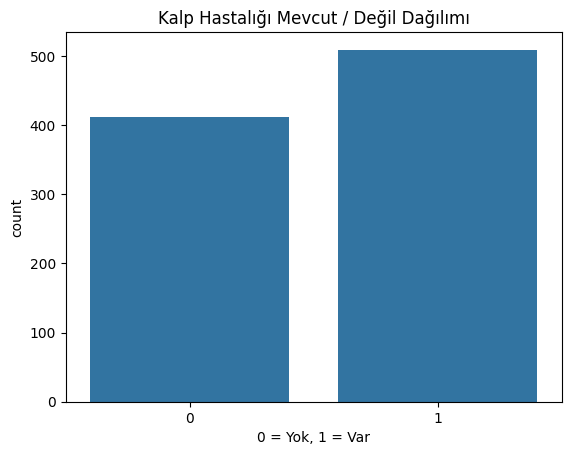

target
1    55.3
0    44.7
Name: proportion, dtype: float64


In [ ]:
sns.countplot(x="target", data=df)
plt.title("Kalp Hastalƒ±ƒüƒ± Mevcut / Deƒüil Daƒüƒ±lƒ±mƒ±")
plt.xlabel("0 = Yok, 1 = Var")
plt.show()

print(df["target"].value_counts(normalize=True).mul(100).round(1))


- **1 (hastalƒ±klƒ±)   ‚Üí  %55.3**
- **0 (saƒülƒ±klƒ±)     ‚Üí  %44.7**



Bu ≈üu anlama gelir:

**Sƒ±nƒ±flar neredeyse dengeli** ‚Üí SMOTE, class_weight gibi teknikleri kullanmana ≈üimdilik gerek yok.

**Accuracy metriƒüi yanƒ±ltƒ±cƒ± olmayacak.** (Dengesiz sƒ±nƒ±flarda accuracy anlamsƒ±z hale gelir, ama burada kullanƒ±labilir.)

**ROC-AUC, Precision, Recall, F1 gibi metrikleri kullanmak h√¢l√¢ mantƒ±klƒ± ama ‚Äúveri dengesiz‚Äù uyarƒ±sƒ±na ihtiya√ß kalmadƒ±.**

## 2.5‚ÄØ¬†Veri G√∂rselle≈ütirme (EDA)

In [ ]:
# 1) Korelasyon ƒ±sƒ± haritasƒ±
def plot_corr(dataframe):
    num_cols = dataframe.select_dtypes(include=['float64', 'int64']).columns
    plt.figure(figsize=(10, 8))
    corr = dataframe[num_cols].corr()
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="RdBu", square=True)
    plt.title("Sayƒ±sal Deƒüi≈ükenler Korelasyon Matrisi")
    plt.tight_layout()
    plt.show()

# ---------------------------------------------

# 2) Histogram + KDE
def plot_hist_kde(dataframe, col, bins=30):
    plt.figure(figsize=(6, 4))
    sns.histplot(data=dataframe, x=col, bins=bins, kde=True, color='skyblue')
    plt.title(f"{col} - Histogram + KDE")

    # √áarpƒ±klƒ±k (skewness) hesapla
    skewness = skew(dataframe[col].dropna())

    plt.text(
        x=0.95, y=0.05,
        s=f"Skewness: {skewness:.3f}",
        ha='right', va='bottom',
        transform=plt.gca().transAxes,
        fontsize=10,
        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="gray", alpha=0.7)
    )

    plt.tight_layout()
    plt.show()

# ---------------------------------------------

# 3) Eksik Deƒüerler
def plot_missing_values(dataframe):
    na = dataframe.isnull().sum()
    na = na[na > 0]
    if not na.empty:
        plt.figure(figsize=(8, 4))
        na.sort_values().plot(kind='barh', color='#ff6666')
        plt.title("Eksik Deƒüerler")
        plt.xlabel("Sayƒ±")
        plt.tight_layout()
        plt.show()
    else:
        print("Eksik deƒüer yok.")

# ---------------------------------------------

# 4) Hedefe‚ÄØG√∂re √ñzet ƒ∞statistik Tablosu
def target_summary(df, target="target"):
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns
    summary = df.groupby(target)[num_cols].agg(["mean", "median"]).T
    display(summary)


# --------------------------------------------

# 5) Target‚Äôa‚ÄØG√∂re Box + Violin kombosu
def plot_box_violin(df, col, target="target", figsize=(6,4)):
    """
    Tek deƒüi≈ükenin daƒüƒ±lƒ±mƒ±nƒ± hedef sƒ±nƒ±flarƒ±na g√∂re box + violin.
    """
    plt.figure(figsize=figsize)
    sns.violinplot(x=target, y=col, data=df, inner=None, palette="RdBu")
    sns.boxplot(x=target, y=col, data=df, width=.2, color="k", showcaps=False,
                boxprops={'facecolor':'none'}, showfliers=False, whiskerprops={'linewidth':0})
    plt.title(f"{col} daƒüƒ±lƒ±mƒ± ‚Äì {target} sƒ±nƒ±flarƒ±")
    plt.tight_layout()
    plt.show()

# --------------------------------------------

# 6) Eksik Deƒüer Isƒ± Haritasƒ± (hƒ±zlƒ± genel bakƒ±≈ü)
def plot_missing_heatmap(df, figsize=(10,6)):
    """DataFrame genelinde eksik deƒüer var mƒ± yok mu hƒ±zlƒ± ƒ±sƒ± haritasƒ±."""
    plt.figure(figsize=figsize)
    sns.heatmap(df.isnull(), cbar=True, yticklabels=True, cmap='Blues')
    plt.title("Eksik Deƒüer Isƒ± Haritasƒ±")
    plt.tight_layout()
    plt.show()


# -------------------------------------------------
# 7) ECDF Grafiƒüi
def plot_ecdf(df, col, hue=None, figsize=(6,4)):
    """
    S√ºrekli deƒüi≈ükenler i√ßin ECDF ‚Äì √∂zellikle medyan, percentil kesi≈üimleri net g√∂sterir.
    """
    from statsmodels.distributions.empirical_distribution import ECDF
    plt.figure(figsize=figsize)

    colors = ['#ff3333', '#3366ff']

    if hue:
        for i, (name, grp) in enumerate(df.groupby(hue)):
            ecdf = ECDF(grp[col].dropna())
            plt.step(ecdf.x, ecdf.y, label=str(name), color=colors[i % len(colors)])
    else:
        ecdf = ECDF(df[col].dropna())
        plt.step(ecdf.x, ecdf.y, color='#3366ff')

    plt.xlabel(col)
    plt.ylabel("ECDF")
    plt.title(f"{col} ‚Äì Empirik K√ºm√ºlatif Daƒüƒ±lƒ±m")
    if hue:
        plt.legend()
    plt.tight_layout()
    plt.show()
# -------------------------------------------------
# 8) √áift S√ºrekli Deƒüi≈üken Arasƒ± Daƒüƒ±lƒ±m + Reg √áizgisi
def plot_scatter_reg(df, x, y, hue=None, add_kde=False, figsize=(6,4)):
    """
    Scatter + (opsiyonel) doƒürusal regresyon √ßizgisi. add_kde=True => arka plan joint KDE.
    """
    if add_kde:
        g = sns.jointplot(data=df, x=x, y=y, hue=hue, kind="kde", fill=True, height=6, alpha=.4, palette="RdBu")
        sns.scatterplot(data=df, x=x, y=y, hue=hue, ax=g.ax_joint, edgecolor="w", s=40)
        g.ax_joint.set_title(f"{x} vs {y}")
    else:
        plt.figure(figsize=figsize)
        sns.scatterplot(data=df, x=x, y=y, hue=hue, edgecolor="w", s=60, alpha=.7, palette="RdBu")
        sns.regplot(data=df, x=x, y=y, scatter=False, color="k", line_kws=dict(alpha=.6))
        plt.title(f"{x} vs {y} (+reg line)")
        plt.tight_layout()
    plt.show()

#-------------------------------------------------
# 9) Kategorik Deƒüi≈ükenlere G√∂re Hedef Deƒüi≈üken Pozitif Oranlarƒ±nƒ±n G√∂rselle≈ütirilmesi
def plot_target_rate(
        df,
        cat_col,
        target="target",
        pos_label=1,
        min_count=20,
        sort_by="rate",
        ascending=False,
        palette="RdBu",
        figsize=(8, 4),
    ):
    """
    Bir kategorik deƒüi≈ükenin her bir sƒ±nƒ±fƒ± i√ßin:
      ‚Ä¢ Pozitif target oranƒ± (%)
      ‚Ä¢ Toplam g√∂zlem sayƒ±sƒ±
    Bar grafikte yan yana g√∂sterir.

    Parameters
    ----------
    df : pd.DataFrame
    cat_col : str
        ƒ∞nceleyeceƒüin kategorik s√ºtun.
    target : str, default "target"
        Hedef deƒüi≈üken adƒ± (ikili veya √ßoklu olur; pos_label kullanƒ±lƒ±r).
    pos_label : int/str/bool, default 1
        "Pozitif" olarak kabul edilecek target deƒüeri.
    min_count : int, default 20
        Daha az g√∂zleme sahip kategoriler grafikten √ßƒ±karƒ±lƒ±r.
    sort_by : {"rate","count"}, default "rate"
        Hangi metriƒüe g√∂re sƒ±ralansƒ±n?
    ascending : bool, default False
        Sƒ±ralama y√∂n√º.
    palette : str or list, default "rocket"
        seaborn renk paleti.
    figsize : tuple, default (8,4)
        Figure boyutu.
    """
    # ----  hazƒ±rlanƒ±≈ü
    tmp = (
        df.groupby(cat_col)[target]
          .agg(rate=lambda x: (x == pos_label).mean() * 100,
               count="size")
          .query("count >= @min_count")
    )
    tmp = tmp.sort_values(sort_by, ascending=ascending)

 #--- √ßizim

    plt.figure(figsize=figsize)
    sns.barplot(x=tmp.index, y="rate", data=tmp, palette=palette)
    plt.ylabel("Pozitif‚ÄØOran (%)")
    plt.xlabel(cat_col)
    plt.title(f"{cat_col}  ‚Üí  {target} (% ve n‚â•{min_count})")

    for i, (pct, cnt) in enumerate(zip(tmp["rate"], tmp["count"])):
        plt.text(i, pct + 1, f"n={cnt}", ha="center", va="bottom", fontsize=9)

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


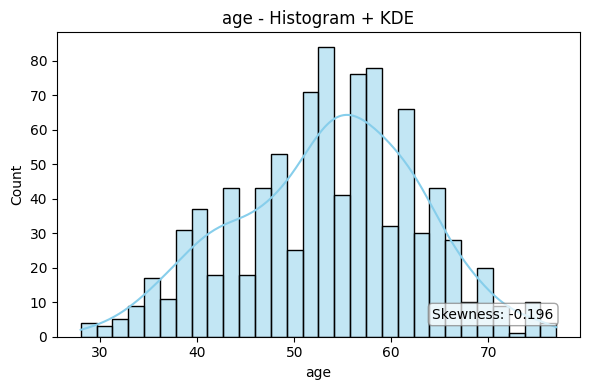

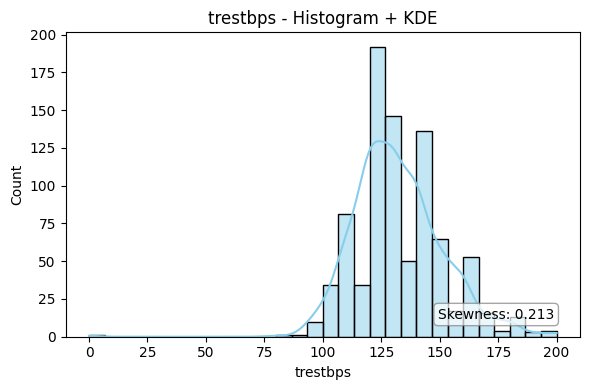

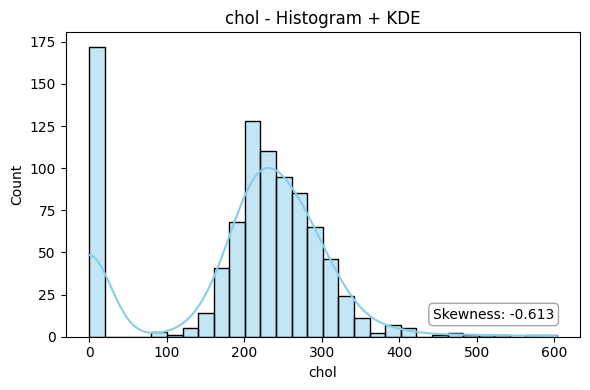

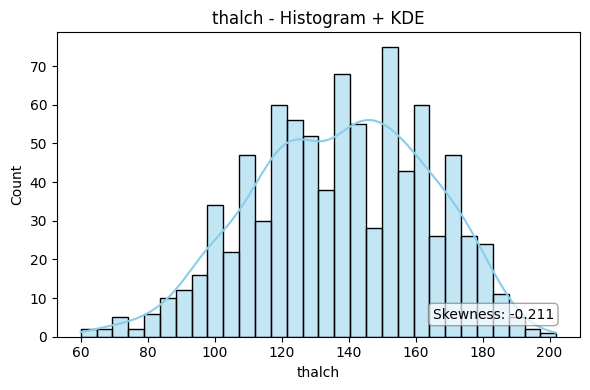

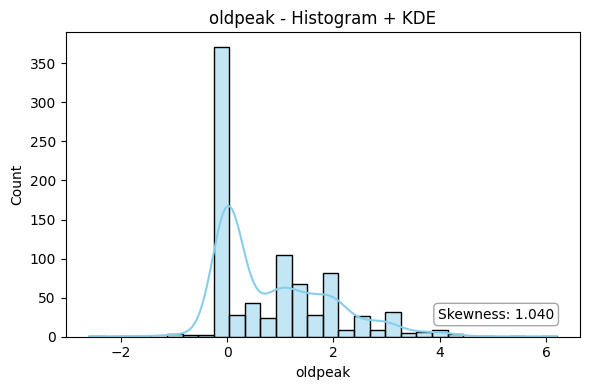

In [ ]:
# Temel daƒüƒ±lƒ±mlar ‚Äì hist+KDE
for col in ["age", "trestbps", "chol", "thalch", "oldpeak"]:
    plot_hist_kde(df, col, bins=30)

## üìâ Histogram + KDE G√∂zlemleri

| Deƒüi≈üken                 | √áarpƒ±klƒ±k Y√∂n√º                            | Aykƒ±rƒ± Deƒüer Potansiyeli                         | Kƒ±sa Not                                             | Boxplot / Violin √áizimi Gerekliliƒüi                  |
|--------------------------|------------------------------------------|-------------------------------------------------|------------------------------------------------------|------------------------------------------------------|
| **chol** (Kolesterol)    | Sola √ßarpƒ±k (Skewness: -0.613)           | Y√ºksek ‚Äì > 500 mg/dl g√∂zlemler winsorize / filtre gerekebilir | Medikal √ºst limiti a≈üan kayƒ±tlar var.                | **Kesinlikle Gerekli** - G√º√ßl√º aykƒ±rƒ± deƒüerler       |
| **age** (Ya≈ü)            | Yakla≈üƒ±k simetrik (Skewness: -0.196)     | D√º≈ü√ºk ‚Äì 28‚Äë77 arasƒ± doƒüal daƒüƒ±lƒ±m                | Yakla≈üƒ±k normal daƒüƒ±lƒ±m.                              | **Gereksiz** ‚Äì Daƒüƒ±lƒ±m simetrik, aykƒ±rƒ± deƒüer az     |
| **thalch** (Maks. kalp hƒ±zƒ±) | Sola √ßarpƒ±k (Skewness: -0.211)           | Orta ‚Äì < 80 veya > 190 bpm u√ß noktalar           | Atletik birey / √∂l√ß√ºm hatasƒ± olabilir                | **Gerekli** ‚Äì U√ß noktalar ve potansiyel hatalar i√ßin  |
| **trestbps** (ƒ∞stirahat KB) | Hafif saƒüa √ßarpƒ±k (Skewness: 0.213)      | Orta-Y√ºksek ‚Äì 0 ve 180‚Äë200 mmHg kayƒ±tlarƒ±        | Hafif saƒüa √ßarpƒ±k                                    | **Gerekli** ‚Äì D√º≈ü√ºk ve y√ºksek u√ß noktalarƒ± incelemek |
| **oldpeak** (ST depresyonu) | G√º√ßl√º saƒüa √ßarpƒ±k (Skewness: 1.040)      | Y√ºksek ‚Äì > 4 k√ºmesi            |  4‚Äë6 arasƒ± u√ß deƒüer | **Gerekli** ‚Äì Aykƒ±rƒ± deƒüerler i√ßeriyor

---

### √áarpƒ±klƒ±k Tanƒ±mlarƒ±  
- **Saƒüa √ßarpƒ±k:** Saƒü kuyruƒüu uzun, b√ºy√ºk deƒüerlere kayƒ±k daƒüƒ±lƒ±m  
- **Sola √ßarpƒ±k:** Sol kuyruƒüu uzun, k√º√ß√ºk deƒüerlere kayƒ±k daƒüƒ±lƒ±m  

---

### üéØ Boxplot / Violin √áizilmesi √ñnerilen Deƒüi≈ükenler

- **chol:** 500 mg/dl √ºzeri outlier‚Äôlarƒ± saptamak i√ßin ve daha da √∂nemlisi 0 olan deƒüerleri incelemek i√ßin **kesinlikle gerekli**  
- **trestbps:** 0 ve > 180 mmHg kayƒ±tlarƒ± g√∂rmek i√ßin **gerekli**  
- **oldpeak:** > 4 deƒüerlerini incelemek i√ßin **gerekli**  
- **thalch:** < 80 / > 190 bpm u√ß noktalarƒ± g√∂rmek i√ßin **gerekli**  
- **age:** Daƒüƒ±lƒ±m simetrik ve aykƒ±rƒ± deƒüer az olduƒüundan **gerekli deƒüil**



In [ ]:
def plot_multiple_boxplots(dataframe, cols, colors=None):
    import matplotlib.pyplot as plt
    import seaborn as sns


    if colors is None:
        colors = [
            '#ffcccc',
            '#ff6666',
            '#b30000',
            '#cce5ff',
            '#3399ff',
            '#004080'
        ]

    n = len(cols)
    fig, axes = plt.subplots(1, n, figsize=(6*n, 4))
    if n == 1:
        axes = [axes]

    for i, col in enumerate(cols):
        c = colors[i % len(colors)]
        sns.boxplot(x=dataframe[col], ax=axes[i], color=c)
        axes[i].set_title(f'{col} Boxplot')

    plt.tight_layout()
    plt.show()



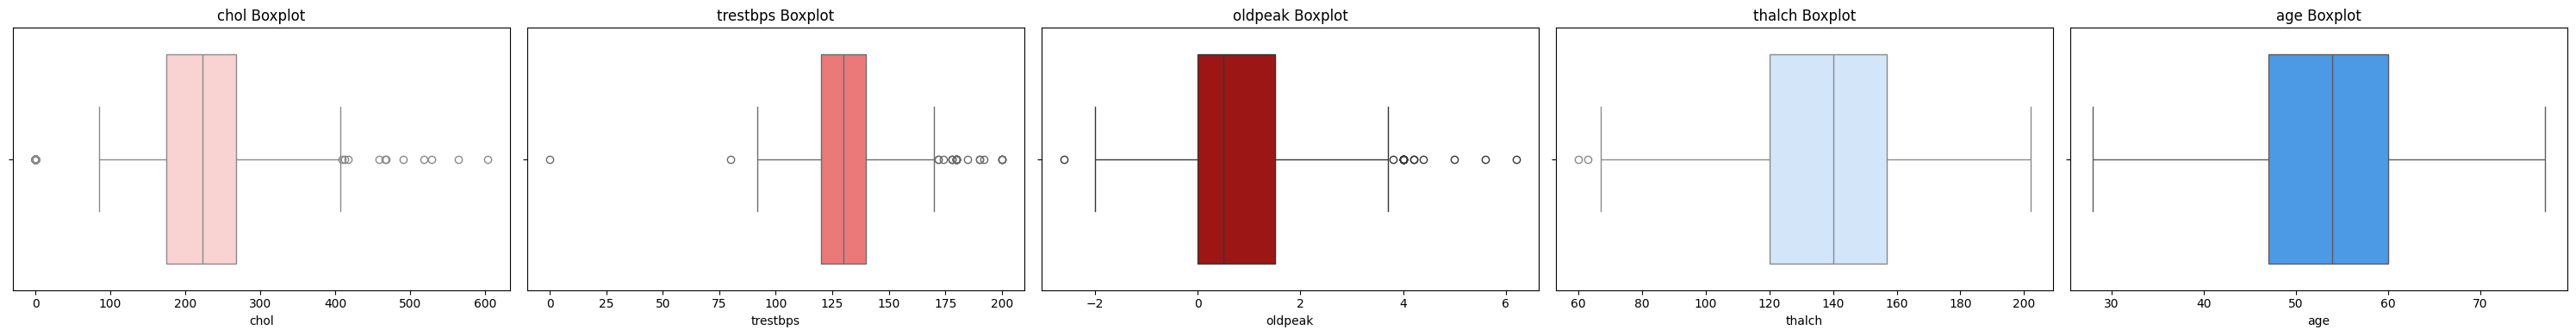

In [ ]:
plot_multiple_boxplots(df, ['chol', 'trestbps', 'oldpeak', 'thalch', 'age'])


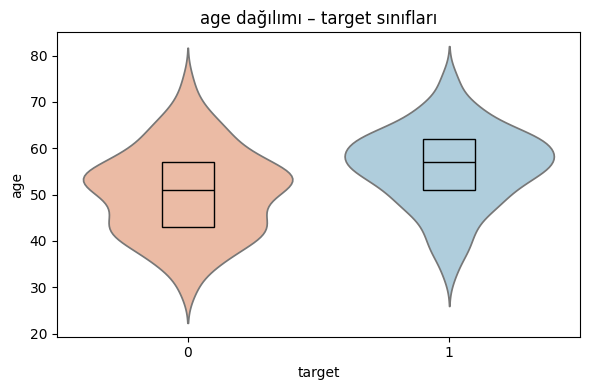

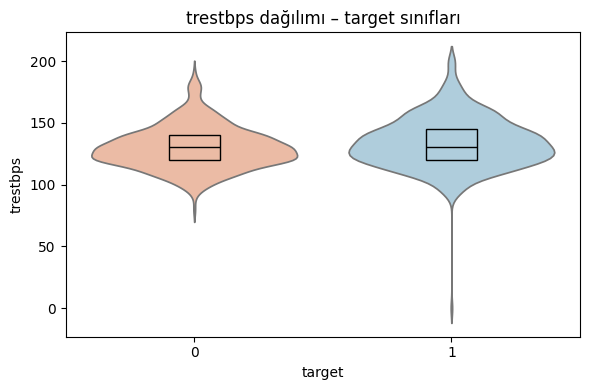

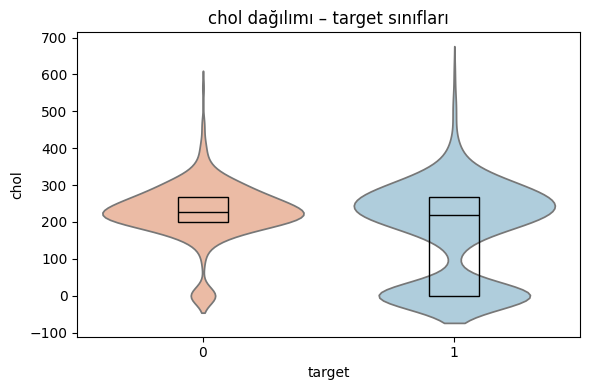

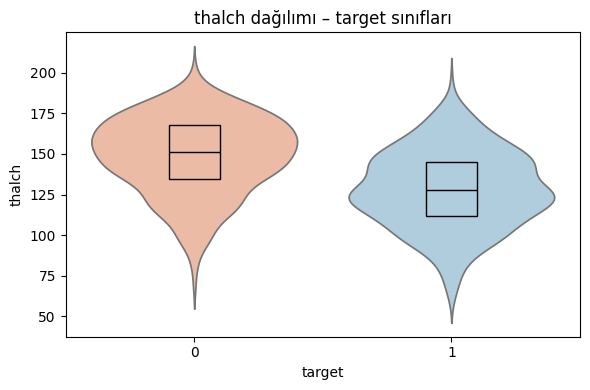

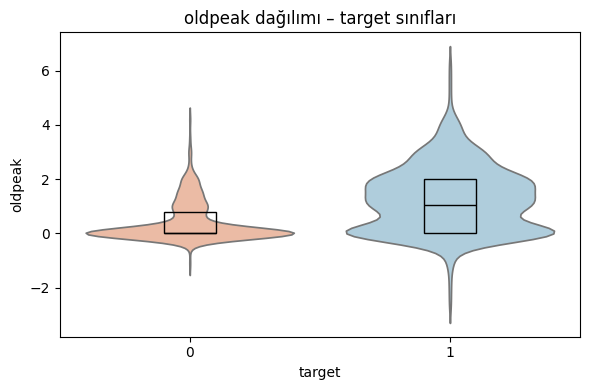

In [ ]:
# Box + Violin ile hedef farklarƒ±
for col in ["age", "trestbps", "chol", "thalch", "oldpeak"]:
    plot_box_violin(df, col)

## Boxplot Analizi: Deƒüi≈ükenlerin Daƒüƒ±lƒ±mƒ± ve Aykƒ±rƒ± Deƒüerler

### Chol (Kolesterol)
- Medyan: ~220 mg/dL civarƒ±nda  
- IQR (√áeyrekler arasƒ± geni≈ülik): ~180-280 mg/dL  
- Saƒü tarafta bir√ßok aykƒ±rƒ± deƒüer var (400+ mg/dL)  
- Daƒüƒ±lƒ±m sola √ßarpƒ±k  

### Trestbps (ƒ∞stirahat Kan Basƒ±ncƒ±)
- Medyan: ~130 mmHg civarƒ±nda  
- IQR: ~120-140 mmHg  
- Hem √ºst hem alt tarafta aykƒ±rƒ± deƒüerler mevcut, daha √ßok √ºst tarafta  

### Oldpeak (ST Depresyonu)
- Medyan: ~1.0 civarƒ±nda  
- IQR: ~0-2.0  
- √úst tarafta √ßok sayƒ±da aykƒ±rƒ± deƒüer (4+ deƒüerler)  
- Belirgin saƒüa √ßarpƒ±k daƒüƒ±lƒ±m  

### Thalch (Maksimum Kalp Hƒ±zƒ±)
- Medyan: ~140 bpm civarƒ±nda  
- IQR: ~120-160 bpm  
- Alt tarafta az sayƒ±da aykƒ±rƒ± deƒüer var  

### Age (Ya≈ü)
- Medyan: ~55 ya≈ü civarƒ±nda  
- IQR: ~48-60 ya≈ü  
- Aykƒ±rƒ± deƒüer yok  
- En normal daƒüƒ±lƒ±ma sahip deƒüi≈üken  

---

### √ñnemli G√∂zlemler
- Oldpeak, Trestbps ve Chol deƒüi≈ükenlerinde en fazla aykƒ±rƒ± deƒüer bulunuyor.  
- Age deƒüi≈ükeni en temiz ve en normal daƒüƒ±lƒ±ma sahip.  
- Aykƒ±rƒ± deƒüerler veri kalitesi ve modelleme a√ßƒ±sƒ±ndan √∂nemlidir.  
- Bu aykƒ±rƒ± deƒüerler ger√ßek tƒ±bbi durumlarƒ± yansƒ±tƒ±yor olabilir (√∂rneƒüin, √ßok y√ºksek kolesterol, negatif oldpeak).  

---


In [ ]:
# Hedefe g√∂re √∂zet istatistik tablosu
target_summary(df)

target                    0           1
id       mean    355.257908  545.479371
         median  345.000000  608.000000
age      mean     50.547445   55.903733
         median   51.000000   57.000000
trestbps mean    129.913043  133.978723
         median  130.000000  130.000000
chol     mean    227.905612  176.479920
         median  228.000000  218.000000
thalch   mean    148.800512  128.261603
         median  151.000000  128.000000
oldpeak  mean      0.418205    1.262607
         median    0.000000    1.050000
ca       mean      0.278788    1.131944
         median    0.000000    1.000000
num      mean      0.000000    1.799607
         median    0.000000    1.000000
target   mean      0.000000    1.000000
         median    0.000000    1.000000

| Deƒüi≈üken | Target=0 (Ortalama) | Target=1 (Ortalama) | Target=0 (Medyan) | Target=1 (Medyan) | Yorum                                                                                  |
|----------|---------------------|---------------------|-------------------|-------------------|---------------------------------------------------------------------------------------|
                                    |
| age      | 50.55               | 55.90               | 51.00             | 57.00             | Hastalƒ±k grubundaki bireyler daha ya≈ülƒ±, ya≈ü kalp hastalƒ±ƒüƒ± ile ili≈ükili olabilir.    |
| trestbps | 129.91              | 133.98              | 130.00            | 130.00            | Tansiyon deƒüerleri hastalƒ±k grubunda biraz daha y√ºksek.                              |
| chol     | 227.91              | 176.48              | 228.00            | 218.00            | Kolesterol hastalƒ±klƒ± grupta beklenmedik ≈üekilde daha d√º≈ü√ºk, dikkatle incelenmeli.    |
| thalch   | 148.80              | 128.26              | 151.00            | 128.00            | Maksimum kalp atƒ±≈ü hƒ±zƒ± hastalƒ±klƒ± grupta anlamlƒ± derecede d√º≈ü√ºk.                     |
| oldpeak  | 0.42                | 1.26                | 0.00              | 1.05              | Egzersiz sonrasƒ± ST depresyonu (oldpeak) hastalƒ±klƒ± grupta y√ºksek, hastalƒ±ƒüƒ± g√∂sterir.|
| ca       | 0.28                | 1.13                | 0.00              | 1.00              | Hastalƒ±klƒ± grupta daha fazla damar etkilenmi≈ü (ca y√ºksek).                            |
| num      | 0.00                | 1.80                | 0.00              | 1.00              | Hastalƒ±k ≈üiddetini g√∂steren num deƒüeri, hasta grubunda mantƒ±ken daha y√ºksek.  √á√ºnk√º target (Hastalƒ±k) bu deƒüi≈ükenden t√ºretildi.                       |
| target   | 0.00                | 1.00                | 0.00              | 1.00              | Hedef deƒüi≈üken, 0 = saƒülƒ±klƒ±, 1 = kalp hastalƒ±ƒüƒ± var.                                |



## üìä Sayƒ±sal Deƒüi≈ükenlerin Hedefe G√∂re Daƒüƒ±lƒ±mlarƒ±

### Age (Ya≈ü)
- Kalp hastalƒ±ƒüƒ± olan bireylerin ya≈üƒ± daha y√ºksek.
- Ya≈ü arttƒ±k√ßa kalp hastalƒ±ƒüƒ± riski artƒ±yor olabilir.

### Trestbps (ƒ∞stirahat Kan Basƒ±ncƒ±)
- Target=1 grubunda ortalama daha y√ºksek.
- Saƒülƒ±klƒ± bireylerde daha d√º≈ü√ºk.

### Chol (Kolesterol)
- Her iki grupta da daƒüƒ±lmƒ±≈ü ama aykƒ±rƒ± y√ºksek deƒüerler var.
- Normalle≈ütirme veya winsorize yapƒ±labilir.

### Thalch (Maksimum Kalp Hƒ±zƒ±)
- Target=1 olan bireylerde belirgin ≈üekilde daha d√º≈ü√ºk.
- Bu, √∂nemli bir sƒ±nƒ±flandƒ±rƒ±cƒ± olabilir.

### Oldpeak (ST Segment Depresyonu)
- Target=1 i√ßin √ßok daha y√ºksek.
- G√º√ßl√º bir ayƒ±rƒ±cƒ± √∂zellik.  
- Ayrƒ±ca daƒüƒ±lƒ±mƒ± √ßok √ßarpƒ±k ‚Üí D√∂n√º≈ü√ºm (√∂rneƒüin log1p) ya da winsorizing gerekebilir.

---

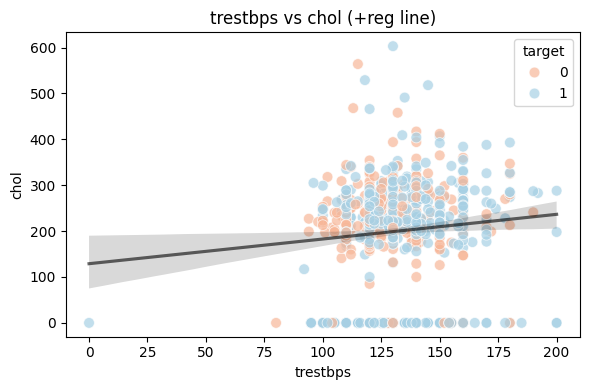

In [ ]:
# ƒ∞kili sayƒ±sal ili≈ükiler
plot_scatter_reg(df, "trestbps", "chol", hue="target")

## Grafik Analizi

### Deƒüi≈ükenler:

- **X ekseni:** Trestbps (Dinlenme Kan Basƒ±ncƒ±) ‚Äî 0-200 mmHg arasƒ±  
- **Y ekseni:** Chol (Kolesterol) ‚Äî 0-600 mg/dL arasƒ±  
- **Renkler:** Target deƒüi≈ükeni (0: Kalp hastalƒ±ƒüƒ± yok, 1: Kalp hastalƒ±ƒüƒ± var)

### G√∂zlemler:

- Regresyon √ßizgisi hafif pozitif bir eƒüim sergiliyor, yani kan basƒ±ncƒ± arttƒ±k√ßa kolesterol seviyelerinde de hafif bir artƒ±≈ü eƒüilimi olduƒüu g√∂zlemleniyor. Bu pozitif korelasyon, kalp hastalƒ±ƒüƒ± risk fakt√∂rleri a√ßƒ±sƒ±ndan anlamlƒ± olabilir.  
- Kan basƒ±ncƒ± deƒüerlerinin b√ºy√ºk √ßoƒüunluƒüu 100-180 mmHg arasƒ±nda yoƒüunla≈ümƒ±≈ü, kolesterol deƒüerleri ise daha √ßok 150-400 mg/dL aralƒ±ƒüƒ±nda yer alƒ±yor.

### Aykƒ±rƒ± Deƒüerler:

- Grafikte kolesterol deƒüeri sƒ±fƒ±r olan bir√ßok veri noktasƒ± mevcut.  
- **Not:** ƒ∞nsan v√ºcudunda kolesterol√ºn sƒ±fƒ±r olmasƒ± biyolojik olarak m√ºmk√ºn deƒüildir; bu nedenle sƒ±fƒ±r deƒüerler b√ºy√ºk olasƒ±lƒ±kla eksik veri kaydƒ±, √∂l√ß√ºm hatasƒ± veya veri giri≈üinde kullanƒ±lan bir eksik deƒüer kodlamasƒ±dƒ±r.  
- Ayrƒ±ca, 600 mg/dL civarƒ±nda √ßok y√ºksek kolesterol deƒüerleri de g√∂zleniyor; bunlar ger√ßek a≈üƒ±rƒ± deƒüerler olabileceƒüi gibi, veri giri≈üi hatasƒ± da olabilir.

### Target Gruplarƒ± Arasƒ±ndaki Daƒüƒ±lƒ±m:

- Kƒ±rmƒ±zƒ± noktalar kalp hastalƒ±ƒüƒ± olmayanlarƒ± (target=0), mavi noktalar ise kalp hastalƒ±ƒüƒ± olan hastalarƒ± (target=1) temsil ediyor.  
- ƒ∞ki grup arasƒ±nda belirgin, net bir ayrƒ±m g√∂zlenmiyor; noktalar birbirine karƒ±≈üƒ±k durumda.  
- ƒ∞lgin√ß bir ≈üekilde, kolesterol seviyesi sƒ±fƒ±r olan hasta grubundaki bireylerin sayƒ±sƒ±, hasta olmayanlara g√∂re daha fazla g√∂r√ºn√ºyor. Bu da veride bir tutarsƒ±zlƒ±k veya eksiklik olduƒüunu d√º≈ü√ºnd√ºr√ºyor. √á√ºnk√º kolesterol, kalp hastalƒ±ƒüƒ± riskinin deƒüerlendirilmesinde kritik bir parametre olduƒüu i√ßin b√∂yle bir durumda verilerin g√ºvenilirliƒüi sorgulanabilir.

### Ki≈üisel Yorumlar:

- Bu grafikten yola √ßƒ±karak, verideki bazƒ± eksik veya hatalƒ± kayƒ±tlarƒ±n analiz sonu√ßlarƒ±nƒ± olumsuz etkileyebileceƒüi sonucuna varƒ±yorum.  
- √ñzellikle kolesterol√ºn sƒ±fƒ±r olmasƒ± gibi biyolojik olarak m√ºmk√ºn olmayan deƒüerler, modelin performansƒ±nƒ± ve √ßƒ±karƒ±mlarƒ±mƒ±zƒ± yanƒ±ltabilir. Bu nedenle, veri temizliƒüi a≈üamasƒ±nda bu t√ºr deƒüerlerin incelenmesi veya d√ºzeltilmesi gerekiyor.  



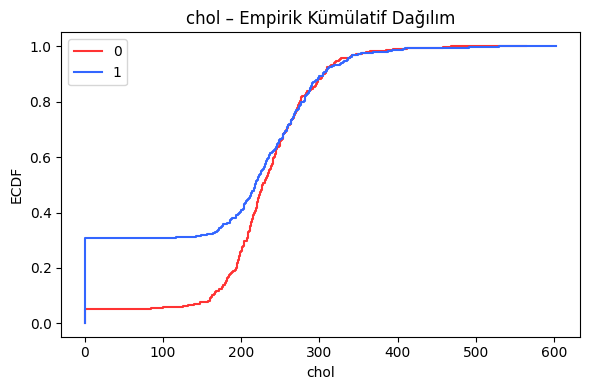

In [ ]:
# ECDF ‚Äì kolesterol daƒüƒ±lƒ±mƒ± (hedef kƒ±rƒ±lƒ±mƒ±)
plot_ecdf(df, "chol", hue="target")

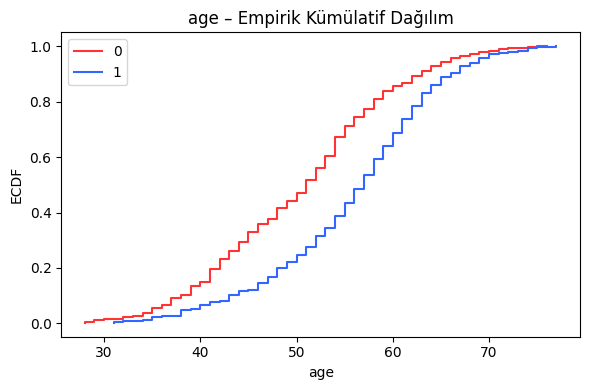

In [ ]:
# ECDF: ‚Äúage‚Äù i√ßin, target bazlƒ±
plot_ecdf(df, col="age", hue="target")

| Grafik                  | Temel Bulgular                                                                                                                          | Detaylƒ± Yorumlar ve Sonu√ßlar                                                                                          |
|-------------------------|----------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------|
| **Kolesterol ECDF**      | - Kƒ±rmƒ±zƒ± √ßizgi (Target=0), kalp hastalƒ±ƒüƒ± olmayan hastalarƒ±<br>- Mavi √ßizgi (Target=1), kalp hastalƒ±ƒüƒ± olan hastalarƒ± g√∂steriyor       | - 0-200 mg/dL aralƒ±ƒüƒ±nda, kalp hastalƒ±ƒüƒ± olanlarda d√º≈ü√ºk kolesterol deƒüerleri daha sƒ±k g√∂r√ºl√ºyor.<br>- 200-350 mg/dL aralƒ±ƒüƒ±nda iki grup arasƒ±nda benzer bir daƒüƒ±lƒ±m var.<br>- 350 mg/dL √ºzeri √ßok y√ºksek kolesterol deƒüerlerinde, kalp hastalƒ±ƒüƒ± olmayanlarda biraz daha fazla g√∂zlem var.<br>- 0-200 deƒüerleri gibi d√º≈ü√ºk kolesterol aralƒ±klarƒ±nda  hasta olanlarƒ±n sayƒ±sƒ± daha fazladƒ±r.                     |
| **Ya≈ü ECDF**             | - Kƒ±rmƒ±zƒ± √ßizgi (Target=0), kalp hastalƒ±ƒüƒ± olmayanlarƒ± temsil ediyor ve genel olarak mavi √ßizginin (Target=1) √ºzerinde seyrediyor         | - 40 ya≈ü altƒ±ndaki bireylerde kalp hastalƒ±ƒüƒ± olmayanlarƒ±n sayƒ±sƒ± belirgin ≈üekilde daha fazla.<br>- 50 ya≈ü civarƒ±nda iki grup arasƒ±ndaki fark en belirgin.<br>- 60 ya≈ü ve √ºzerindeki ya≈ü gruplarƒ±nda fark azalsa da kalp hastalƒ±ƒüƒ± olmayanlar genellikle daha gen√ß ya≈ü grubunda yoƒüun.|


- **Dipnot:** 0-200 mg/dL aralƒ±ƒüƒ±ndaki d√º≈ü√ºk kolesterol deƒüerlerinde, kalp hastalƒ±ƒüƒ± olan bireylerin sayƒ±sƒ±nƒ±n daha fazla olmasƒ± ilgin√ß bir durumdur. Normal ≈üartlarda, d√º≈ü√ºk kolesterol seviyelerinin kalp hastalƒ±ƒüƒ± riskini azalttƒ±ƒüƒ± d√º≈ü√ºn√ºl√ºr. Ancak bu g√∂zlem ≈üu anlamlara gelebilir:

     - Veride eksik veya hatalƒ± kayƒ±tlar olabilir.

     - D√º≈ü√ºk kolesterol, bazƒ± hastalarda ila√ß tedavisi veya ya≈üam tarzƒ± deƒüi≈üiklikleri sonucu ortaya √ßƒ±kmƒ±≈ü olabilir.

 - Kalp hastalƒ±ƒüƒ±nƒ±n geli≈üiminde kolesterolden ba≈üka fakt√∂rler (√∂rneƒüin genetik yatkƒ±nlƒ±k, ya≈üam tarzƒ±, diƒüer saƒülƒ±k problemleri) daha baskƒ±n rol oynuyor olabilir.

 Bu nedenle, sadece kolesterol deƒüerine bakarak kalp hastalƒ±ƒüƒ± riskini deƒüerlendirmek yeterli olmayabilir. G√∂zlem, verinin daha derinlemesine incelenmesi gerektiƒüini ve kolesterol dƒ±≈üƒ±ndaki fakt√∂rlerin de analiz edilmesinin √∂nemli olduƒüunu g√∂stermektedir.

 - Ya≈üa gelince <br>- Ya≈ü ilerledik√ße kalp hastalƒ±ƒüƒ± riski artƒ±yor ve ya≈ü, kolesterole g√∂re √ßok daha g√º√ßl√º bir predikt√∂r olarak kar≈üƒ±mƒ±za √ßƒ±kƒ±yor.               

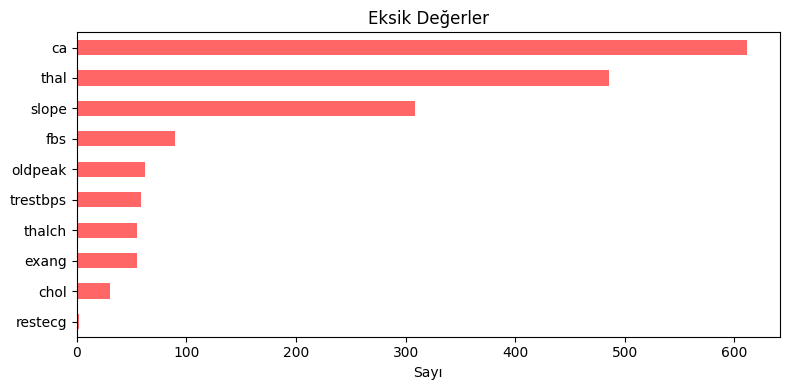

In [ ]:
# Eksik deƒüer kontrol√º
plot_missing_values(df)

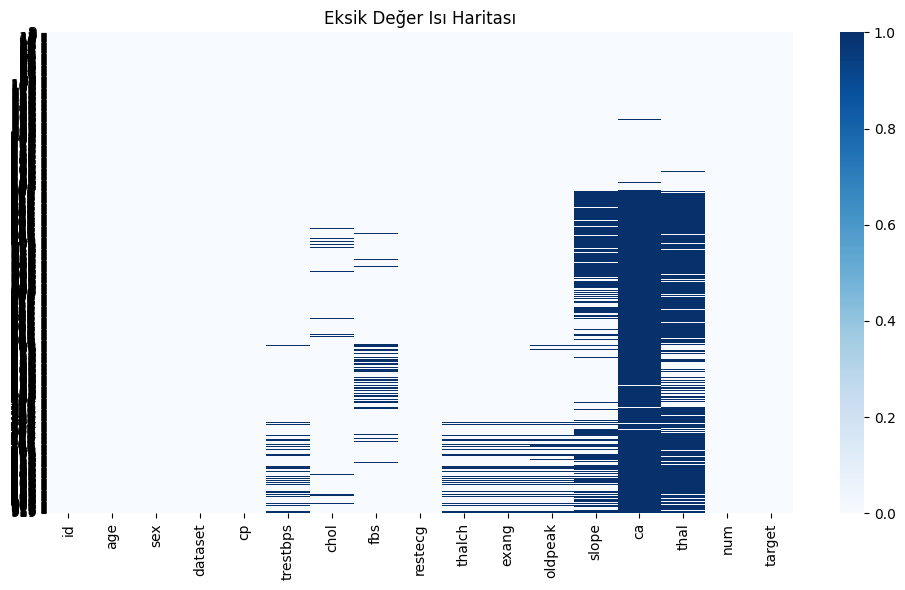

In [ ]:
# Genel eksik deƒüer ƒ±sƒ±sƒ±
plot_missing_heatmap(df)

## Eksik Deƒüerlerin Analizi

Bu iki grafik, kalp hastalƒ±ƒüƒ± veri setindeki eksik deƒüerlerin durumunu ve daƒüƒ±lƒ±mƒ±nƒ± g√∂stermektedir.

### Grafik 1: Eksik Deƒüerlerin Sayƒ±sal Daƒüƒ±lƒ±mƒ±

- **ca (koroner anjiyografi):** En fazla eksik deƒüere sahip (~600 eksik kayƒ±t).  
- **thal (talasemi):** ƒ∞kinci en fazla eksik deƒüer (~480 eksik kayƒ±t).  
- **slope (ST eƒüimi):** Orta d√ºzeyde eksik deƒüer (~300 eksik kayƒ±t).  
- **fbs, oldpeak, trestbps, thalch, exang:** Az miktarda eksik deƒüer (50-100 arasƒ±).  
- **chol:** √áok az eksik deƒüer (~30).  
- **restecg:** Hi√ß eksik deƒüer bulunmamaktadƒ±r.

### Grafik 2: Eksik Deƒüer Isƒ± Haritasƒ± (Heatmap)

- Mavi √ßizgiler eksik deƒüerleri temsil eder.  
- Beyaz veya a√ßƒ±k renkli alanlar mevcut verileri g√∂sterir.  
- **ca** ve **thal** deƒüi≈ükenlerinde yoƒüun MAVƒ∞ √ßizgiler g√∂zlemlenmekte, yani bu deƒüi≈ükenlerde √ßok sayƒ±da eksik deƒüer bulunmaktadƒ±r.  
- Diƒüer deƒüi≈ükenlerde ise daha az ve daƒüƒ±nƒ±k eksik deƒüer desenleri g√∂r√ºlmektedir.

### √ñnemli √áƒ±karƒ±mlar

- **ca** ve **thal** deƒüi≈ükenlerinde veri setinin %50‚Äôden fazlasƒ± eksiktir. Bu durum, bu deƒüi≈ükenlerin analiz ve modelleme s√ºrecinde √∂zel olarak ele alƒ±nmasƒ± gerektiƒüini g√∂sterir.  
- Eksik veri i≈üleme stratejileri (√∂rneƒüin, uygun atama y√∂ntemleri veya verinin √ßƒ±karƒ±lmasƒ±) planlanmalƒ±dƒ±r.  


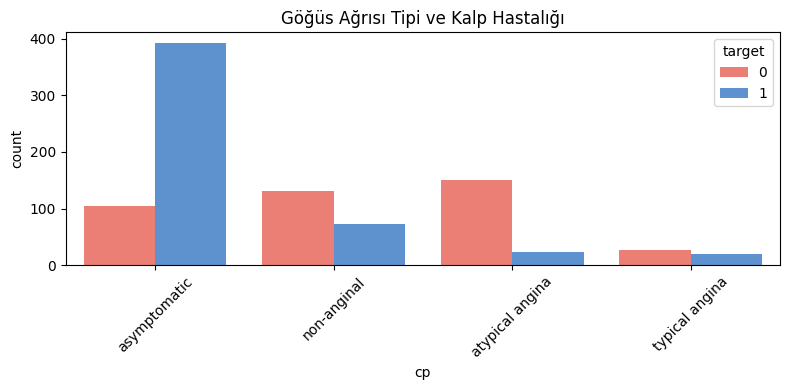

In [ ]:

plt.figure(figsize=(8, 4))
sns.countplot(x="cp", hue="target", data=df,
              order=df["cp"].value_counts().index,
              palette=["#FF6F61", "#4A90E2"])
plt.title("G√∂ƒü√ºs Aƒürƒ±sƒ± Tipi ve Kalp Hastalƒ±ƒüƒ±")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# G√∂ƒü√ºs aƒürƒ±sƒ± tipi s√ºtunundaki benzersiz deƒüerler ve sayƒ±larƒ±
print(df['cp'].value_counts(dropna=False))


cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64


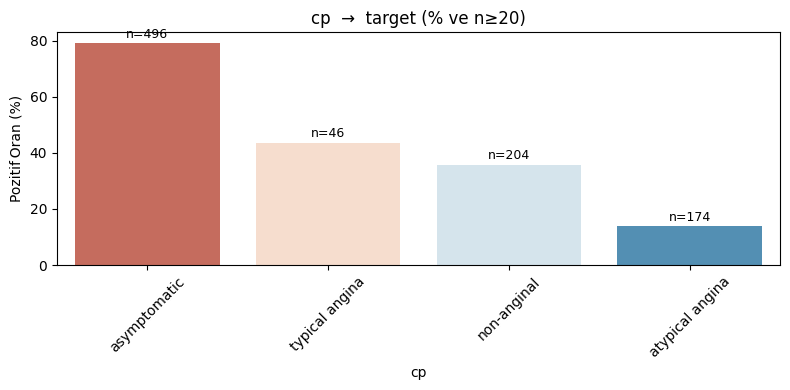

In [ ]:
#¬†G√∂ƒü√ºs aƒürƒ±sƒ± tipi (cp) ile kalp hastalƒ±ƒüƒ± ili≈ükisi
plot_target_rate(df, cat_col="cp", target="target", pos_label=1)


## G√∂ƒü√ºs Aƒürƒ±sƒ± Tipleri ve Hedef Deƒüi≈üken ƒ∞li≈ükisi

### G√∂ƒü√ºs Aƒürƒ±sƒ± Tipleri ve Pozitif Oranlar:

| G√∂ƒü√ºs Aƒürƒ±sƒ± Tipi        | Pozitif Oran (%) | Hasta Sayƒ±sƒ± (n) | Risk Seviyesi          | Notlar                                      |
|--------------------------|------------------|------------------|-----------------------|---------------------------------------------|
| **Asymptomatic (Asemptomatik)**  | ~78%             | 496              | En y√ºksek risk grubu   | En b√ºy√ºk hasta grubu. ƒ∞leri evre kalp hastalƒ±ƒüƒ± ile ili≈ükili olabilir. |
| **Typical Angina (Tipik Anjina)** | ~43%             | 46               | Orta-y√ºksek risk       | En k√º√ß√ºk hasta grubu. Erken tanƒ± ve tedavi nedeniyle pozitif oran orta d√ºzeyde.                  |
| **Non-anginal (Non-anjinal)**     | ~35%             | 204              | Orta risk              | ƒ∞kinci b√ºy√ºk hasta grubu.                                                      |
| **Atypical Angina (Atipik Anjina)**| ~13%             | 174              | En d√º≈ü√ºk risk grubu    | En d√º≈ü√ºk pozitif oran.                                                          |

### √ñnemli Bulgular:

- Asemptomatik hastalar, yakla≈üƒ±k %78 pozitif oranla en y√ºksek risk grubunu olu≈üturuyor.  
- Bu durum, hedef deƒüi≈ükenin kalp hastalƒ±ƒüƒ± varlƒ±ƒüƒ±nƒ± g√∂sterdiƒüini d√º≈ü√ºnd√ºr√ºyor.  
- Y√ºksek pozitif oran, asemptomatik hastalarƒ±n hastalƒ±ƒüƒ±n ileri evresi ile ili≈ükili olabileceƒüine i≈üaret ediyor.  
- Tipik anjina hastalarƒ±nƒ±n orta d√ºzeyde pozitif oranƒ±, erken tanƒ± ve tedavi etkisini yansƒ±tabilir.  
- Genel olarak, g√∂ƒü√ºs aƒürƒ±sƒ± tipi kalp hastalƒ±ƒüƒ± tanƒ±sƒ±nda √∂nemli bir predikt√∂rd√ºr.

---

### G√∂ƒü√ºs Aƒürƒ±sƒ± Tiplerinin Kalp Hastalƒ±ƒüƒ± (Target) ile Daƒüƒ±lƒ±mƒ±:

- **Asemptomatik (Asymptomatic):**  
  Kalp hastalƒ±ƒüƒ± olan hastalarda (target=1) en y√ºksek sayƒ±da g√∂r√ºl√ºyor ( yakla≈üƒ±k 380 hasta).  
  Kalp hastalƒ±ƒüƒ± olmayan hastalarda (target=0) daha az g√∂r√ºl√ºyor ( yakla≈üƒ±k 110 hasta).  
  Bu durum paradoksal g√∂r√ºnebilir √ß√ºnk√º asemptomatik hasta sayƒ±sƒ±nƒ±n kalp hastalƒ±ƒüƒ± olanlarda daha y√ºksek olmasƒ± beklenmedik bir bulgudur.

- **Tipik Olmayan Anjinal G√∂ƒü√ºs Aƒürƒ±sƒ± (Atypical Angina):**  
  Kalp hastalƒ±ƒüƒ± olmayan hastalarda daha sƒ±k ( yakla≈üƒ±k 150 hasta).  
  Kalp hastalƒ±ƒüƒ± olan hastalarda daha az (yakla≈üƒ±k 24 hasta).

- **Anjinal Olmayan G√∂ƒü√ºs Aƒürƒ±sƒ± (Non-anginal):**  
  Her iki grupta da orta d√ºzeyde g√∂r√ºl√ºyor.  
  Kalp hastalƒ±ƒüƒ± olmayanlar: yakla≈üƒ±k 129 hasta  
  Kalp hastalƒ±ƒüƒ± olanlar: yakla≈üƒ±k 75 hasta

- **Tipik Anjinal G√∂ƒü√ºs Aƒürƒ±sƒ± (Typical Angina):**  
  En d√º≈ü√ºk sayƒ±larda g√∂r√ºl√ºyor.  
  Her iki grupta da benzer d√º≈ü√ºk sayƒ±lar (yakla≈üƒ±k 20-25 hasta), kalp hastalƒ±ƒüƒ± olmayanlar bir miktar daha fazla.

### Genel Deƒüerlendirme:

Bu veriler, g√∂ƒü√ºs aƒürƒ±sƒ± tipinin kalp hastalƒ±ƒüƒ± tanƒ±sƒ±nda √∂nemli bir predikt√∂r olabileceƒüini g√∂stermektedir. √ñzellikle asemptomatik hastalarƒ±n y√ºksek risk ta≈üƒ±dƒ±ƒüƒ± dikkate alƒ±nmalƒ± ve bu hastalar yakƒ±n takip edilmelidir.




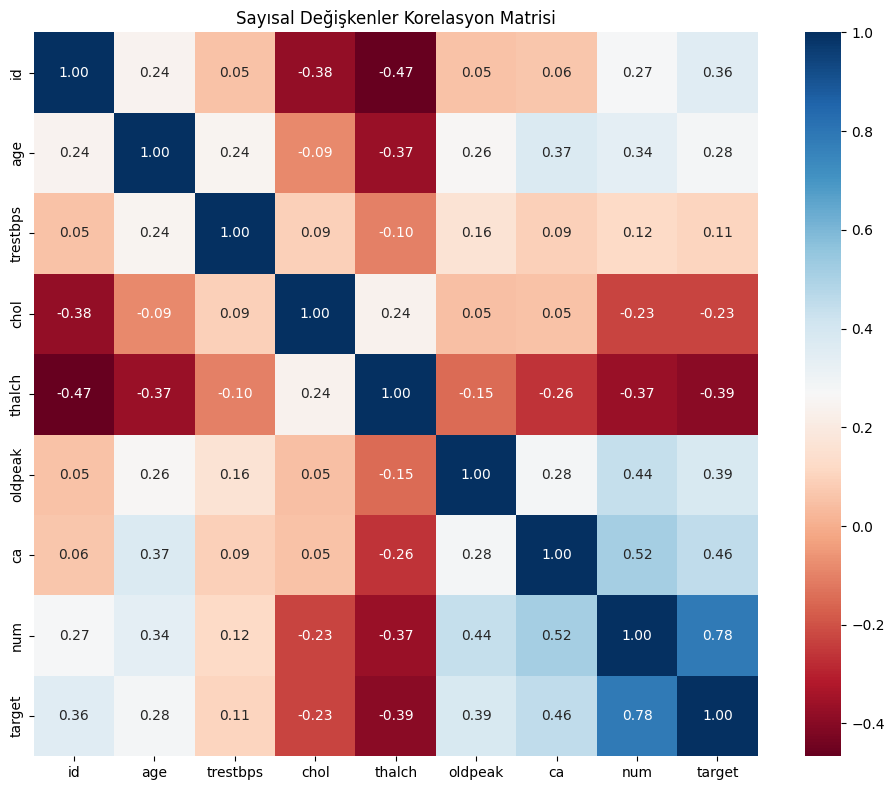

In [ ]:
# Sayƒ±sal deƒüi≈ükenlerde genel korelasyon
plot_corr(df)

## Korelasyon Matrisi Analizi

Bu korelasyon matrisi, kalp hastalƒ±ƒüƒ± veri setindeki sayƒ±sal deƒüi≈ükenler arasƒ±ndaki ili≈ükileri g√∂stermektedir. Renk kodlamasƒ± korelasyon katsayƒ±sƒ±nƒ±n y√∂n√ºn√º ve b√ºy√ºkl√ºƒü√ºn√º yansƒ±tƒ±r.

---

### G√º√ßl√º Pozitif Korelasyonlar (Mavi, > 0.5)

- **num ‚Üî target**: `0.78`  
  - En g√º√ßl√º korelasyon. `target` deƒüi≈ükeni doƒürudan `num` deƒüi≈ükeninden t√ºretildiƒüi i√ßin bu beklenen bir durumdur.
- **ca ‚Üî num**: `0.52`  
  - Koroner anjiyografi sonucu ile kalp hastalƒ±ƒüƒ± arasƒ±nda anlamlƒ± ili≈üki vardƒ±r.

---

### Orta D√ºzey Pozitif Korelasyonlar (0.3 ‚Äì 0.5)

- **ca ‚Üî target**: `0.46`  
- **oldpeak ‚Üî target**: `0.39`  
- **oldpeak ‚Üî num**: `0.44`  
- **age ‚Üî ca**: `0.37`  
- **age ‚Üî num**: `0.34`  

Bu ili≈ükiler, ya≈üƒ±n ve EKG sonu√ßlarƒ±nƒ±n kalp hastalƒ±ƒüƒ±na etkisini desteklemektedir.

---

### G√º√ßl√º Negatif Korelasyonlar (Kƒ±rmƒ±zƒ±, < -0.3)

- **thalch ‚Üî age**: `-0.37`  
  - Ya≈ü arttƒ±k√ßa maksimum kalp hƒ±zƒ± d√º≈ümektedir (fizyolojik olarak beklenen durum).
- **thalch ‚Üî target**: `-0.39`  
  - D√º≈ü√ºk maksimum kalp hƒ±zƒ± kalp hastalƒ±ƒüƒ± riskini artƒ±rmaktadƒ±r.
- **thalch ‚Üî oldpeak**: `-0.37`  
- **thalch ‚Üî num**: `-0.37`  

Maksimum kalp hƒ±zƒ±, hem ya≈üla hem de kalp hastalƒ±ƒüƒ± g√∂stergeleriyle ters ili≈ükilidir.

---

### √ñnemli Tƒ±bbi Bulgular

- **Ya≈ü Fakt√∂r√º:** Ya≈ü arttƒ±k√ßa kalp hƒ±zƒ± d√º≈üer, bu da dolaylƒ± olarak kalp hastalƒ±ƒüƒ± riskini etkileyebilir.
- **Tanƒ±sal G√º√ßl√º Deƒüi≈ükenler:**  
  - `ca` (koroner anjiyografi)  
  - `oldpeak` (ST depresyonu)  
- **Kalp Hƒ±zƒ±:** D√º≈ü√ºk maksimum kalp hƒ±zƒ± (thalch), kalp hastalƒ±ƒüƒ± riskiyle ili≈ükilidir.

---

### Zayƒ±f Korelasyonlar

- **chol (Kolesterol):** Beklenenden d√º≈ü√ºk korelasyon g√∂steriyor.
- **trestbps (ƒ∞stirahat Kan Basƒ±ncƒ±):** Kalp hastalƒ±ƒüƒ± ile neredeyse hi√ß korelasyon g√∂stermiyor.

---

### Modelleme ƒ∞√ßin √áƒ±karƒ±mlar

- En prediktif deƒüi≈ükenler: `ca`, `oldpeak`, `thalch`, `age`
- `num` ve `target` deƒüi≈ükenleri arasƒ±nda y√ºksek korelasyon bulunuyor; bu nedenle biri model dƒ±≈üƒ± bƒ±rakƒ±labilir.

# 3. Veri √ñn i≈üleme (Data Processing)

## 3.1. Eksik Deƒüerlerin Ele Alƒ±nmasƒ±

## Kalp Hastalƒ±ƒüƒ± Veri K√ºmesi ‚Äì Eksik Deƒüer Stratejisi

### Eksik Deƒüeri Olmayan S√ºtunlar

| S√ºtun | A√ßƒ±klama |
|---|---|
| id | Benzersiz kimlik ‚Äì modelde kullanƒ±lmaz |
| age | Ya≈ü, kritik risk g√∂stergesi |
| sex | Cinsiyet |
| dataset | Veri kaynaƒüƒ± (alt‚Äëset) |
| cp | G√∂ƒü√ºs aƒürƒ±sƒ± tipi |
| num | Hedef deƒüi≈ükenin orijinali |

### Eksik Deƒüer ƒ∞√ßeren S√ºtunlar

### Eksik Deƒüer ƒ∞√ßeren S√ºtunlar

| S√ºtun    | Eksik (n) | Eksik (%) | A√ßƒ±klama                                              |                                  |                                                              |
|----------|-----------|-----------|-------------------------------------------------------|------------------------------------------------------|------------------------------------------------------------------------------------------------|
| **trestbps** | 59        | 6.4%      | ƒ∞stirahat kan basƒ±ncƒ± (mmHg) ‚Äì hipertansiyon g√∂stergesi |
| **chol**    | 30        | 3.3%      | Serum kolesterol (mg/dL) ‚Äì ateroskleroz riski          |
| **fbs**     | 90        | 9.8%      | A√ßlƒ±k kan ≈üekeri >‚ÄØ120‚ÄØmg/dL?                                     |
| **restecg** | 2         | 0.2%      | ƒ∞stirahat EKG sonucu                                        |
| **thalch**  | 55        | 6.0%      | Maksimum kalp hƒ±zƒ± (bpm)                               |
| **exang**   | 55        | 6.0%      | Egzersize baƒülƒ± anjina (True/False)                    |
| **oldpeak** | 62        | 6.7%      | Egzersize baƒülƒ± ST depresyonu                          |
| **slope**   | 309       | 33.6%     | Egzersiz ST segment eƒüimi                                      |
| **ca**      | 611       | 66.4%     | Floroskopide renklendirilmi≈ü damar sayƒ±sƒ± (0‚Äë3)       |
| **thal**    | 486       | 52.8%     | Talasemi (sintigrafi) testi sonucu                              |


### √áƒ±karƒ±larak Denenebilir Deƒüi≈ükenler

| S√ºtun | Gerek√ße |
|---|---|
| fbs | D√º≈ü√ºk prediktif g√º√ß olasƒ±lƒ±ƒüƒ± |
| thal | Eksikliƒüi √ßok y√ºksek |
| slope | Eksikliƒüi y√ºksek, klinik fayda modele baƒülƒ± |



---

> **Not:** Model performansƒ±nƒ± **Accuracy**, **ROC‚ÄëAUC**, **F1** metrikleriyle kar≈üƒ±la≈ütƒ±rarak her senaryoyu test etmek en saƒülam yoldur.


In [ ]:
df = df.drop(['id', 'dataset'], axis=1)


In [ ]:
#----------------median----------------------------------
median_cols = ['trestbps', 'chol', 'thalch', 'oldpeak']
for col in median_cols:
    df[col] = df[col].fillna(df[col].median())

#----------------mod-------------------------------------
mode_cols = ['fbs', 'restecg', 'exang']
for col in mode_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

#----------------bilinmiyor etiketi-----------------------
unknown_cols = ['ca', 'thal', 'slope']
for col in unknown_cols:
    df[col] = df[col].fillna("bilinmiyor")

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
target      0
dtype: int64

## Eksik Deƒüer ƒ∞mputasyonu

| Adƒ±m | ƒ∞lgili S√ºtun(lar) | Kullanƒ±lan Y√∂ntem | A√ßƒ±klama |
|------|------------------|-------------------|----------|
| **Ortanca (Median) ile Doldurma** | `trestbps`, `chol`, `thalch`, `oldpeak` | `.fillna(df[col].median())` | S√ºrekli (sayƒ±sal) deƒüi≈ükenlerde‚ÄØu√ß deƒüerlerin etkisini azaltmak i√ßin ortanca tercih edildi. |
| **Mod (Mode) ile Doldurma** | `fbs`, `restecg`, `exang` | `.fillna(df[col].mode()[0])` | Kategorik/sayƒ±sal ama az sƒ±nƒ±fa sahip s√ºtunlarda en sƒ±k g√∂r√ºlen deƒüerle dolduruldu. |
| **‚Äúbilinmiyor‚Äù Etiketiyle Doldurma** | `ca`, `thal`, `slope` | `.fillna("bilinmiyor")` | Klinik olarak ‚Äúbilinmeyen‚Äù durumlarƒ± ayrƒ± bir kategori olarak korumak adƒ±na √∂zel etiket verildi. |


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   cp        920 non-null    object 
 3   trestbps  920 non-null    float64
 4   chol      920 non-null    float64
 5   fbs       920 non-null    bool   
 6   restecg   920 non-null    object 
 7   thalch    920 non-null    float64
 8   exang     920 non-null    bool   
 9   oldpeak   920 non-null    float64
 10  slope     920 non-null    object 
 11  ca        920 non-null    object 
 12  thal      920 non-null    object 
 13  num       920 non-null    int64  
 14  target    920 non-null    int64  
dtypes: bool(2), float64(4), int64(3), object(6)
memory usage: 95.4+ KB


## 3.2. Aykƒ±rƒ± Deƒüerlerin Ele Alƒ±nmasƒ±

In [ ]:
# Sayƒ±sal s√ºtunlarƒ± se√ß (target hari√ß)
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
# 'target' ve 'num' √ßƒ±kar
for col_to_remove in ['target', 'num']:
    if col_to_remove in num_cols:
        num_cols.remove(col_to_remove)

# IQR ile aykƒ±rƒ± deƒüer tespiti fonksiyonu
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)][col]
    return outliers.index.tolist(), lower_bound, upper_bound

# Aykƒ±rƒ± deƒüerleri bul ve yazdƒ±r
for col in num_cols:
    outliers_idx, lower, upper = detect_outliers_iqr(df, col)
    print(f"{col}: {len(outliers_idx)} aykƒ±rƒ± deƒüer, alt sƒ±nƒ±r: {lower:.2f}, √ºst sƒ±nƒ±r: {upper:.2f}")


age: 0 aykƒ±rƒ± deƒüer, alt sƒ±nƒ±r: 27.50, √ºst sƒ±nƒ±r: 79.50
trestbps: 28 aykƒ±rƒ± deƒüer, alt sƒ±nƒ±r: 90.00, √ºst sƒ±nƒ±r: 170.00
chol: 185 aykƒ±rƒ± deƒüer, alt sƒ±nƒ±r: 43.88, √ºst sƒ±nƒ±r: 400.88
thalch: 2 aykƒ±rƒ± deƒüer, alt sƒ±nƒ±r: 66.00, √ºst sƒ±nƒ±r: 210.00
oldpeak: 16 aykƒ±rƒ± deƒüer, alt sƒ±nƒ±r: -2.25, √ºst sƒ±nƒ±r: 3.75


| S√ºtun     | Aykƒ±rƒ± Deƒüer Sayƒ±sƒ± | Alt Sƒ±nƒ±r | √úst Sƒ±nƒ±r | Notlar ve √ñneriler                                                |
|-----------|---------------------|-----------|-----------|------------------------------------------------------------------|
| age       | 0                   | 27.50     | 79.50     | Aykƒ±rƒ± deƒüer yok, temiz veri                                     |
| trestbps  | 28                  | 90.00     | 170.00    | Winsorizing uygulanabilir; kan basƒ±ncƒ± deƒüerleri √∂nemli          |
| chol      | 185                 | 41.62     | 402.62    | √áok fazla aykƒ±rƒ± var; winsorizing ve/veya box-cox d√∂n√º≈ü√ºm√º d√º≈ü√ºn√ºlebilir. 0 deƒüerleri biyolojik olarak anlamsƒ±z, bu satƒ±rlar temizlenmeli veya uygun ≈üekilde doldurulmalƒ±. 160 √ºst√º deƒüerler i√ßin winsorizing veya d√∂n√º≈ü√ºm √∂nerilir. |
| thalch    | 2                   | 65.40     | 211.00    | √áok az aykƒ±rƒ±, genelde bƒ±rakƒ±labilir, √ßƒ±karƒ±labilir veya winsorizing yapƒ±labilir |
| oldpeak   | 16                  | -2.25     | 3.75      | Negatif deƒüerler var; log d√∂n√º≈ü√ºm√º uygun deƒüil, Box-Cox veya Yeo-Johnson ya da winsorizing ile u√ß kƒ±rpma d√º≈ü√ºn√ºlebilir |
| slope     | 0                   | -0.20     | 3.00      | Aykƒ±rƒ± yok, ekstra i≈ülem gerekmiyor                               |
| thal      | 0                   | -0.20     | 3.00      | Aykƒ±rƒ± yok                                                      |

### √ñneriler:

- **Winsorizing**: `trestbps` ve `chol` i√ßin a≈üƒ±rƒ± u√ß deƒüerleri sƒ±nƒ±rlar i√ßine √ßekmek.
- **Kolesterol (chol) √∂zel √∂neri**:  
  - 0 deƒüerleri biyolojik olarak m√ºmk√ºn olmadƒ±ƒüƒ±ndan bu satƒ±rlar temizlenmeli veya medyan gibi uygun bir deƒüerle doldurulmalƒ±.  
  - 160 √ºzerindeki y√ºksek deƒüerler i√ßin winsorizing yapƒ±labilir veya Box-Cox / Yeo-Johnson d√∂n√º≈ü√ºmleri uygulanabilir. Klinik anlamƒ± varsa bƒ±rakƒ±lƒ±p model performansƒ±na bakƒ±labilir.  
- **Oldpeak**: Negatif deƒüerler i√ßerdiƒüinden log d√∂n√º≈ü√ºm√º uygun deƒüil. Winsorizing yapƒ±labilir ancak negatif u√ßlarƒ±n klinik anlamƒ± olduƒüu i√ßin dikkatli olunmalƒ±. Alternatif olarak **Box-Cox** veya negatif deƒüerleri de destekleyen **Yeo-Johnson** d√∂n√º≈ü√ºm√º tercih edilebilir.
- **Aykƒ±rƒ± olmayan s√ºtunlar** (`age`, `slope`, `thal`): Normal bƒ±rakƒ±labilir.



In [ ]:
for col in ["trestbps", "chol", "thalch", "oldpeak"]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"{col}: Alt sƒ±nƒ±r = {lower_bound}, √úst sƒ±nƒ±r = {upper_bound}")

trestbps: Alt sƒ±nƒ±r = 90.0, √úst sƒ±nƒ±r = 170.0
chol: Alt sƒ±nƒ±r = 43.875, √úst sƒ±nƒ±r = 400.875
thalch: Alt sƒ±nƒ±r = 66.0, √úst sƒ±nƒ±r = 210.0
oldpeak: Alt sƒ±nƒ±r = -2.25, √úst sƒ±nƒ±r = 3.75


In [ ]:
for col in ["trestbps", "chol", "thalch", "oldpeak"]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"{col}:")
    print(f"  Q1 = {Q1}")
    print(f"  Q3 = {Q3}")
    print(f"  IQR = {IQR}")
    print(f"  Alt sƒ±nƒ±r = {lower_bound}")
    print(f"  √úst sƒ±nƒ±r = {upper_bound}\n")

trestbps:
  Q1 = 120.0
  Q3 = 140.0
  IQR = 20.0
  Alt sƒ±nƒ±r = 90.0
  √úst sƒ±nƒ±r = 170.0

chol:
  Q1 = 177.75
  Q3 = 267.0
  IQR = 89.25
  Alt sƒ±nƒ±r = 43.875
  √úst sƒ±nƒ±r = 400.875

thalch:
  Q1 = 120.0
  Q3 = 156.0
  IQR = 36.0
  Alt sƒ±nƒ±r = 66.0
  √úst sƒ±nƒ±r = 210.0

oldpeak:
  Q1 = 0.0
  Q3 = 1.5
  IQR = 1.5
  Alt sƒ±nƒ±r = -2.25
  √úst sƒ±nƒ±r = 3.75



In [ ]:
for col in ["trestbps", "chol","thalch", "oldpeak"]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[f"{col}_winsorized"] = df[col].clip(lower=lower_bound, upper=upper_bound)


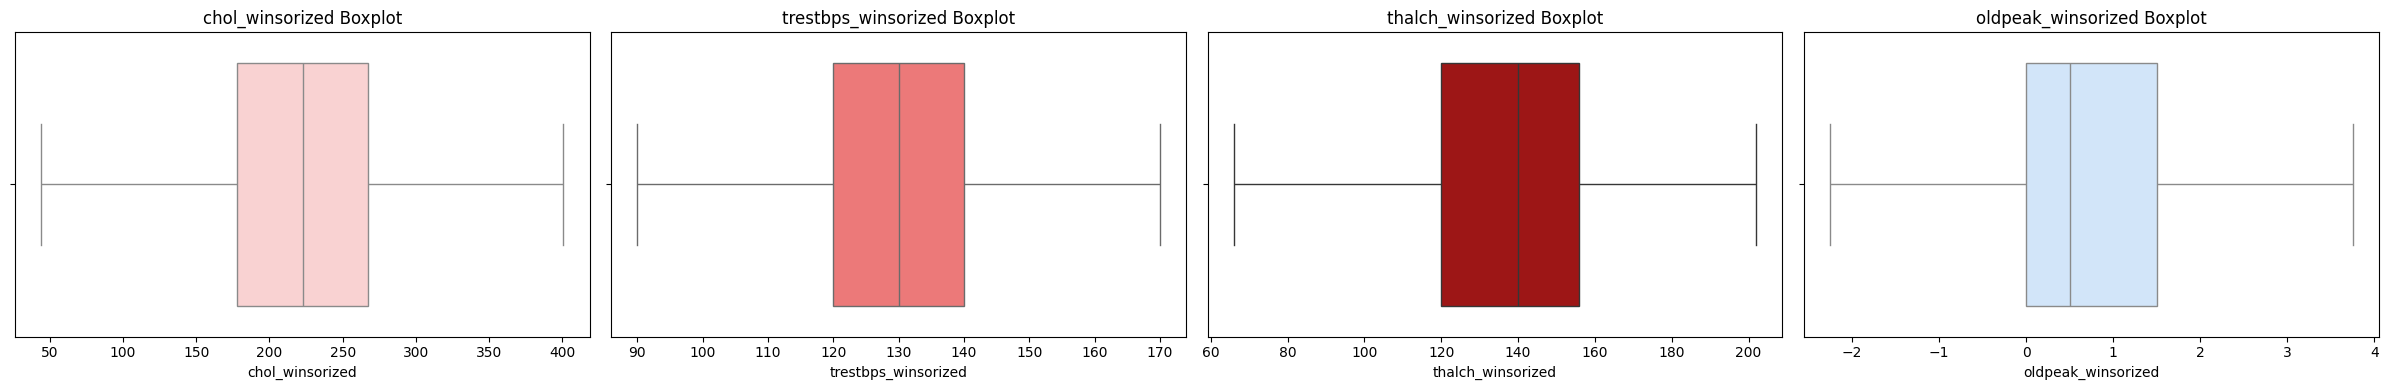

In [ ]:
plot_multiple_boxplots(df, ['chol_winsorized', 'trestbps_winsorized','thalch_winsorized', 'oldpeak_winsorized'])

In [ ]:
df.head()

age     sex               cp  trestbps   chol    fbs         restecg  \
0   63    Male   typical angina     145.0  233.0   True  lv hypertrophy   
1   67    Male     asymptomatic     160.0  286.0  False  lv hypertrophy   
2   67    Male     asymptomatic     120.0  229.0  False  lv hypertrophy   
3   37    Male      non-anginal     130.0  250.0  False          normal   
4   41  Female  atypical angina     130.0  204.0  False  lv hypertrophy   

   thalch  exang  oldpeak        slope   ca               thal  num  target  \
0   150.0  False      2.3  downsloping  0.0       fixed defect    0       0   
1   108.0   True      1.5         flat  3.0             normal    2       1   
2   129.0   True      2.6         flat  2.0  reversable defect    1       1   
3   187.0  False      3.5  downsloping  0.0             normal    0       0   
4   172.0  False      1.4    upsloping  0.0             normal    0       0   

   trestbps_winsorized  chol_winsorized  thalch_winsorized  oldpeak_winsorized  
0                145.0            233.0              150.0                 2.3  
1                160.0            286.0              108.0                 1.5  
2                120.0            229.0              129.0                 2.6  
3                130.0            250.0              187.0                 3.5  
4                130.0            204.0              172.0                 1.4

In [ ]:
print((df['chol_winsorized'] <= 0).sum())

# Orijinalde 0 olan satƒ±r sayƒ±sƒ±
print((df['chol'] == 0).sum())
print((df['trestbps'] == 0).sum())

0
172
1


Not: Kolesterol s√ºtunundaki 0 deƒüerler biyolojik olarak hatalƒ± veri giri≈üidir. Bu deƒüerler Winsorizing i≈ülemi ile makul ve anlamlƒ± aralƒ±ƒüa kƒ±rpƒ±lmƒ±≈ütƒ±r. Bu nedenle bu s√ºtunda ekstra doldurma (imputation) yapƒ±lmamƒ±≈ütƒ±r.

In [ ]:
drop_cols = ['trestbps', 'chol', 'thalch', 'oldpeak']
df = df.drop(columns=drop_cols)
df.head()

age     sex               cp    fbs         restecg  exang        slope  \
0   63    Male   typical angina   True  lv hypertrophy  False  downsloping   
1   67    Male     asymptomatic  False  lv hypertrophy   True         flat   
2   67    Male     asymptomatic  False  lv hypertrophy   True         flat   
3   37    Male      non-anginal  False          normal  False  downsloping   
4   41  Female  atypical angina  False  lv hypertrophy  False    upsloping   

    ca               thal  num  target  trestbps_winsorized  chol_winsorized  \
0  0.0       fixed defect    0       0                145.0            233.0   
1  3.0             normal    2       1                160.0            286.0   
2  2.0  reversable defect    1       1                120.0            229.0   
3  0.0             normal    0       0                130.0            250.0   
4  0.0             normal    0       0                130.0            204.0   

   thalch_winsorized  oldpeak_winsorized  
0              150.0                 2.3  
1              108.0                 1.5  
2              129.0                 2.6  
3              187.0                 3.5  
4              172.0                 1.4

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  920 non-null    int64  
 1   sex                  920 non-null    object 
 2   cp                   920 non-null    object 
 3   fbs                  920 non-null    bool   
 4   restecg              920 non-null    object 
 5   exang                920 non-null    bool   
 6   slope                920 non-null    object 
 7   ca                   920 non-null    object 
 8   thal                 920 non-null    object 
 9   num                  920 non-null    int64  
 10  target               920 non-null    int64  
 11  trestbps_winsorized  920 non-null    float64
 12  chol_winsorized      920 non-null    float64
 13  thalch_winsorized    920 non-null    float64
 14  oldpeak_winsorized   920 non-null    float64
dtypes: bool(2), float64(4), int64(3), object

## üîç Deƒüi≈ükenlere G√∂re Aykƒ±rƒ± Deƒüer Analizi ve Uygulanan ƒ∞≈ülem Stratejisi

| **Deƒüi≈üken** | **√ñnceki Sorun Tespiti** | **Kendi Yakla≈üƒ±mƒ±m / Uygulanan ƒ∞≈ülem** |
|--------------|---------------------------|----------------------------------------|
| `trestbps` (ƒ∞stirahat Kan Basƒ±ncƒ±) | 0 deƒüeri olabilir ‚Üí eksik veri; ayrƒ±ca u√ß deƒüerler hipertansiyona i≈üaret edebilir | Veri setinde 0 deƒüere yalnƒ±zca 1 satƒ±rda rastlandƒ±, bu nedenle **silinmedi**. U√ß deƒüer etkisini azaltmak i√ßin **Winsorizing** uygulandƒ± (Alt: 90, √úst: 170). |
| `chol` (Kolesterol) | 0 deƒüerleri ‚Üí biyolojik olarak imk√¢nsƒ±z ‚Üí eksik kabul edilmeli <br> >500 mg/dL ‚Üí outlier | 0 deƒüerler doƒürudan **Winsorizing** ile alt sƒ±nƒ±ra (‚âà44 mg/dL) √ßekildi. B√∂ylece ek bir doldurma i≈ülemine gerek kalmadan hem hatalƒ± giri≈üler d√ºzeltilmi≈ü hem de u√ß deƒüer etkisi azaltƒ±lmƒ±≈ü oldu. |
| `oldpeak` (ST Segment Deƒüi≈üimi) | Negatif deƒüerler ST depresyonu i√ßin mantƒ±ksƒ±z ‚Üí silinmeli veya 0 yapƒ±lmalƒ± | Bu deƒüerler aslƒ±nda **ST elevasyonu** anlamƒ±na geldiƒüi i√ßin **klinik olarak anlamlƒ±dƒ±r**. Silinmedi; bunun yerine tƒ±bbi bilgiyi koruyarak **Winsorizing** ile u√ß deƒüer etkisi azaltƒ±ldƒ± (Alt: ‚Äì2.25, √úst: 3.75). |
| `thalch` (Maksimum Kalp Atƒ±m Hƒ±zƒ±) | <60 veya >200 bpm ‚Üí kontrol edilmeli, gerekirse winsorize edilmeli | Tƒ±bbi a√ßƒ±dan anlamlƒ± sƒ±nƒ±rlarda kalan u√ß deƒüerler i√ßin **Winsorizing** uygulandƒ± (Alt: 66, √úst: 210). |


---
---

üìå Ek Not:
Winsorizing y√∂ntemi sayesinde:

0 veya negatif gibi silinmesi √∂nerilen deƒüerler korunmu≈ü oldu,

Veri kaybƒ± ya≈üanmadƒ±,

U√ß deƒüer etkisi sƒ±nƒ±rlanarak model performansƒ± artƒ±rƒ±ldƒ±,

Ve aynƒ± zamanda hem klinik anlam korunup hem de modelin stabilitesi saƒülandƒ±.


## 3.3. Feature Engineering

In [ ]:

# 1. Kan basƒ±ncƒ± kategorisi (bp_category)
def bp_cat(bp):
    if bp < 120:
        return 'normal'
    elif 120 <= bp < 140:
        return 'prehipertansiyon'
    else:
        return 'hipertansiyon'
df['bp_category'] = df['trestbps_winsorized'].apply(bp_cat)
bp_dummies = pd.get_dummies(df['bp_category'], prefix='bp')
df = pd.concat([df, bp_dummies], axis=1)
# orijinal kategorik s√ºtunu kaldƒ±rma
df.drop('bp_category', axis=1, inplace=True)
# 2. Kolesterol bayraƒüƒ± (chol_flag)
df['chol_flag'] = np.where(df['chol_winsorized'] >= 240, 1, 0)
# 3. oldpeak y√∂n√º (oldpeak_sign)
df['oldpeak_sign'] = np.where(df['oldpeak_winsorized'] >= 0, 1, 0)
# 4. A√ßlƒ±k kan ≈üekeri bayraƒüƒ± (fbs_flag)
df['fbs_flag'] = df['fbs'].astype(int)
# 5. Egzersize baƒülƒ± anjina bayraƒüƒ± (exang_flag)
df['exang_flag'] = df['exang'].astype(int)

In [ ]:
df.head()

age     sex               cp    fbs         restecg  exang        slope  \
0   63    Male   typical angina   True  lv hypertrophy  False  downsloping   
1   67    Male     asymptomatic  False  lv hypertrophy   True         flat   
2   67    Male     asymptomatic  False  lv hypertrophy   True         flat   
3   37    Male      non-anginal  False          normal  False  downsloping   
4   41  Female  atypical angina  False  lv hypertrophy  False    upsloping   

    ca               thal  num  ...  chol_winsorized  thalch_winsorized  \
0  0.0       fixed defect    0  ...            233.0              150.0   
1  3.0             normal    2  ...            286.0              108.0   
2  2.0  reversable defect    1  ...            229.0              129.0   
3  0.0             normal    0  ...            250.0              187.0   
4  0.0             normal    0  ...            204.0              172.0   

   oldpeak_winsorized  bp_hipertansiyon  bp_normal  bp_prehipertansiyon  \
0                 2.3              True      False                False   
1                 1.5              True      False                False   
2                 2.6             False      False                 True   
3                 3.5             False      False                 True   
4                 1.4             False      False                 True   

   chol_flag  oldpeak_sign  fbs_flag  exang_flag  
0          0             1         1           0  
1          1             1         0           1  
2          0             1         0           1  
3          1             1         0           0  
4          0             1         0           0  

[5 rows x 22 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  920 non-null    int64  
 1   sex                  920 non-null    object 
 2   cp                   920 non-null    object 
 3   fbs                  920 non-null    bool   
 4   restecg              920 non-null    object 
 5   exang                920 non-null    bool   
 6   slope                920 non-null    object 
 7   ca                   920 non-null    object 
 8   thal                 920 non-null    object 
 9   num                  920 non-null    int64  
 10  target               920 non-null    int64  
 11  trestbps_winsorized  920 non-null    float64
 12  chol_winsorized      920 non-null    float64
 13  thalch_winsorized    920 non-null    float64
 14  oldpeak_winsorized   920 non-null    float64
 15  bp_hipertansiyon     920 non-null    boo

## Feature Engineering ile Olu≈üturulan Yeni √ñzelliklerin √ñnemi

| √ñzellik               | A√ßƒ±klama                                                                                   | Modelleme A√ßƒ±sƒ±ndan Faydasƒ±                                                     |
|-----------------------|--------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------|
| **bp_category (One-Hot Encoding)** | Kan basƒ±ncƒ± seviyesinin normal, prehipertansiyon ve hipertansiyon olarak kategorize edilmesi. | Kan basƒ±ncƒ± kalp krizi riskini doƒürudan etkiler. Kategorik sƒ±nƒ±flandƒ±rma, modelin riski daha iyi anlamasƒ±nƒ± saƒülar. |
| **chol_flag**          | Kolesterol deƒüeri 240 mg/dL ve √ºzeri olanlar i√ßin bayrak (1), diƒüerleri i√ßin 0.             | Y√ºksek kolesterol kalp damar hastalƒ±ƒüƒ± risk fakt√∂r√ºd√ºr. Model i√ßin √∂nemli bir uyarƒ±cƒ±dƒ±r. |
| **oldpeak_sign**       | Egzersize baƒülƒ± ST depresyonunun pozitif veya negatif y√∂n√º (ST elevasyonu).                 | ST segmentindeki deƒüi≈üim kalp hasarƒ±nƒ± g√∂sterir. Y√∂n bilgisi klinik a√ßƒ±dan anlamlƒ±dƒ±r. |
| **fbs_flag**           | A√ßlƒ±k kan ≈üekeri > 120 mg/dL durumu i√ßin ikili bayrak (True/False ‚Üí 1/0).                   | Y√ºksek kan ≈üekeri (diyabet) kalp hastalƒ±ƒüƒ± riskini artƒ±rƒ±r, model bu riski daha iyi √∂ƒürenir. |
| **exang_flag**         | Egzersize baƒülƒ± anjina varlƒ±ƒüƒ± i√ßin ikili bayrak (True/False ‚Üí 1/0).                       | Egzersize baƒülƒ± g√∂ƒü√ºs aƒürƒ±sƒ± kalp krizine yakƒ±nlƒ±ƒüƒ± g√∂sterir ve model i√ßin √∂nemli bir belirtidir. |

### Genel A√ßƒ±klama

- Bu √∂zellikler, klinik a√ßƒ±dan kalp krizi riskini etkileyen anahtar fakt√∂rlerin modelde net ve anla≈üƒ±lƒ±r ≈üekilde temsil edilmesini saƒülar.
- Sayƒ±sal deƒüerlerin yanƒ± sƒ±ra anlamlƒ± kategorilere veya bayraklara d√∂n√º≈üt√ºr√ºlmesi, modelin karma≈üƒ±k ili≈ükileri daha kolay √∂ƒürenmesini ve yorumlamasƒ±nƒ± saƒülar.
- B√∂ylece hem model performansƒ± artar hem de modelin karar mekanizmasƒ± daha ≈üeffaf ve yorumlanabilir olur.
---
---

## Feature Engineering‚Äôin Performansa Etkisi ve Doƒüru √ñzellik √áƒ±karƒ±mƒ±

### Performans Kar≈üƒ±la≈ütƒ±rmasƒ± (Overfitting √∂ncesi parametrelerle oynanmadan √∂nce)

| √ñl√ß√ºt                      | Feature Engineering √ñncesi | Feature Engineering Sonrasƒ± |
|----------------------------|----------------------------|-----------------------------|
| Ortalama Precision (Makro)  | 0.828                      | **0.836**                   |
| Ortalama Recall (Makro)     | 0.836                      | **0.842**                   |
| Ortalama F1-Score (Makro)   | 0.831                      | **0.840**                   |
| Ortalama Accuracy          | 0.833                      | **0.842**                   |

> **Deƒüerlendirme:**  
> Feature engineering i≈ülemi sonrasƒ± model performansƒ±nda anlamlƒ± iyile≈ümeler g√∂zlenmi≈ütir. Bu durum, yeni olu≈üturulan √∂zelliklerin modelin veriyi daha etkili √∂ƒürenmesini ve tahmin doƒüruluƒüunu artƒ±rmasƒ±nƒ± saƒülamƒ±≈ütƒ±r.

---


> **Sonu√ß:**  
> Klinik a√ßƒ±dan anlamlƒ± ve hedef deƒüi≈ükenle ili≈ükili bu yeni √∂zellikler, modelin kalp krizi riskini daha doƒüru tahmin etmesine olanak saƒülamƒ±≈ütƒ±r. √ñzellik m√ºhendisliƒüi ile doƒüru ve anlamlƒ± deƒüi≈ükenlerin √ßƒ±karƒ±lmasƒ±, makine √∂ƒürenmesi modellerinin ba≈üarƒ±sƒ±nƒ± doƒürudan artƒ±ran kritik bir adƒ±mdƒ±r.


## 3.3. Gerekli encoding i≈ülemleri

| S√ºtun    | T√ºr√º               | √ñnerilen Encoding     | Sebep                                                                                               |
|----------|--------------------|-----------------------|----------------------------------------------------------------------------------------------------|
| sex      | Kategorik (2 deƒüer) | Label Encoding        | ƒ∞ki deƒüerli (Male, Female) olduƒüu i√ßin 0-1 kodlama yeterli, boyut artƒ±≈üƒ± olmadan kolay kullanƒ±lƒ±r.    |
| cp       | Kategorik (4 deƒüer) | One-Hot Encoding      | G√∂ƒü√ºs aƒürƒ±sƒ± tipi (4 kategori), ordinal deƒüil, one-hot uygun.                                       |
| fbs      | Kategorik (2 deƒüer) | Label Encoding        | True/False (iki deƒüer), binary olarak 0/1 yapƒ±labilir.                                             |
| restecg  | Kategorik (3 deƒüer) | One-Hot Encoding      | 3 farklƒ± kategori, sƒ±ralƒ± deƒüil, one-hot ile ayrƒ±lmalƒ±.                                            |
| exang    | Kategorik (2 deƒüer) | Label Encoding        | ƒ∞ki deƒüerli (True/False), 0-1 yaparak kullanƒ±labilir.                                              |
| slope    | Kategorik (3 deƒüer) | Label Encoding        | Sƒ±ralƒ± (ordinal) kategorik deƒüi≈üken; downsloping < flat < upsloping ≈üeklinde doƒüal sƒ±ralamasƒ± var. |
| thal     | Kategorik (3 deƒüer) | One-Hot Encoding      | 3 kategori var, anlamlƒ± sƒ±ralama yok, one-hot daha uygun.                                          |



## **Ca ƒ∞√ßin;**

### Neden One-Hot Encoding?

`ca` s√ºtunu √∂nceleri sayƒ±sal bir deƒüi≈ükendi (0,1,2,3 gibi deƒüerler). Ancak eksik deƒüerleri `"bilinmiyor"` etiketi ile doldurduƒüumuzda, s√ºtun sayƒ±sal olmaktan √ßƒ±karak karƒ±≈üƒ±k (sayƒ±sal + kategorik) bir hale geldi.

Bu nedenle One-Hot Encoding tercih edilmesinin sebepleri ≈üunlardƒ±r:

- `ca` s√ºtunundaki `"bilinmiyor"` kategorisi ile sayƒ±sal sƒ±ralamanƒ±n karƒ±≈ümasƒ± engellenir.
- Kategorilerin her biri ayrƒ± s√ºtun olarak temsil edilir, model kategoriyi doƒüru ayƒ±rt eder.
- Yanlƒ±≈ü sƒ±ralama veya b√ºy√ºkl√ºk √ßƒ±karƒ±mƒ± olmaz, veri anlam b√ºt√ºnl√ºƒü√º korunur.
- Saƒülƒ±k verileri gibi kritik deƒüi≈ükenlerde modelin hata yapma olasƒ±lƒ±ƒüƒ± azalƒ±r.


In [ ]:
le = LabelEncoder()

# Label Encoding yapƒ±lacak s√ºtunlar
label_encode_cols = ['sex', 'fbs', 'exang', 'slope']

for col in label_encode_cols:
    df[f'{col}_label'] = le.fit_transform(df[col])

In [ ]:
df.head()

age     sex               cp    fbs         restecg  exang        slope  \
0   63    Male   typical angina   True  lv hypertrophy  False  downsloping   
1   67    Male     asymptomatic  False  lv hypertrophy   True         flat   
2   67    Male     asymptomatic  False  lv hypertrophy   True         flat   
3   37    Male      non-anginal  False          normal  False  downsloping   
4   41  Female  atypical angina  False  lv hypertrophy  False    upsloping   

    ca               thal  num  ...  bp_normal  bp_prehipertansiyon  \
0  0.0       fixed defect    0  ...      False                False   
1  3.0             normal    2  ...      False                False   
2  2.0  reversable defect    1  ...      False                 True   
3  0.0             normal    0  ...      False                 True   
4  0.0             normal    0  ...      False                 True   

   chol_flag  oldpeak_sign  fbs_flag  exang_flag  sex_label  fbs_label  \
0          0             1         1           0          1          1   
1          1             1         0           1          1          0   
2          0             1         0           1          1          0   
3          1             1         0           0          1          0   
4          0             1         0           0          0          0   

   exang_label  slope_label  
0            0            1  
1            1            2  
2            1            2  
3            0            1  
4            0            3  

[5 rows x 26 columns]

In [ ]:
drop_cols = ['sex', 'fbs', 'exang', 'slope']
df = df.drop(columns=drop_cols)
df.head()

age               cp         restecg   ca               thal  num  target  \
0   63   typical angina  lv hypertrophy  0.0       fixed defect    0       0   
1   67     asymptomatic  lv hypertrophy  3.0             normal    2       1   
2   67     asymptomatic  lv hypertrophy  2.0  reversable defect    1       1   
3   37      non-anginal          normal  0.0             normal    0       0   
4   41  atypical angina  lv hypertrophy  0.0             normal    0       0   

   trestbps_winsorized  chol_winsorized  thalch_winsorized  ...  bp_normal  \
0                145.0            233.0              150.0  ...      False   
1                160.0            286.0              108.0  ...      False   
2                120.0            229.0              129.0  ...      False   
3                130.0            250.0              187.0  ...      False   
4                130.0            204.0              172.0  ...      False   

   bp_prehipertansiyon  chol_flag  oldpeak_sign  fbs_flag  exang_flag  \
0                False          0             1         1           0   
1                False          1             1         0           1   
2                 True          0             1         0           1   
3                 True          1             1         0           0   
4                 True          0             1         0           0   

   sex_label  fbs_label  exang_label  slope_label  
0          1          1            0            1  
1          1          0            1            2  
2          1          0            1            2  
3          1          0            0            1  
4          0          0            0            3  

[5 rows x 22 columns]

In [ ]:
df.head()

age               cp         restecg   ca               thal  num  target  \
0   63   typical angina  lv hypertrophy  0.0       fixed defect    0       0   
1   67     asymptomatic  lv hypertrophy  3.0             normal    2       1   
2   67     asymptomatic  lv hypertrophy  2.0  reversable defect    1       1   
3   37      non-anginal          normal  0.0             normal    0       0   
4   41  atypical angina  lv hypertrophy  0.0             normal    0       0   

   trestbps_winsorized  chol_winsorized  thalch_winsorized  ...  bp_normal  \
0                145.0            233.0              150.0  ...      False   
1                160.0            286.0              108.0  ...      False   
2                120.0            229.0              129.0  ...      False   
3                130.0            250.0              187.0  ...      False   
4                130.0            204.0              172.0  ...      False   

   bp_prehipertansiyon  chol_flag  oldpeak_sign  fbs_flag  exang_flag  \
0                False          0             1         1           0   
1                False          1             1         0           1   
2                 True          0             1         0           1   
3                 True          1             1         0           0   
4                 True          0             1         0           0   

   sex_label  fbs_label  exang_label  slope_label  
0          1          1            0            1  
1          1          0            1            2  
2          1          0            1            2  
3          1          0            0            1  
4          0          0            0            3  

[5 rows x 22 columns]

In [ ]:
# One-Hot Encoding yapƒ±lacak s√ºtunlar
one_hot_cols = [ 'cp', 'restecg', 'thal', 'ca']

df = pd.get_dummies(df, columns=one_hot_cols, prefix=one_hot_cols)


In [ ]:
df.head()

age  num  target  trestbps_winsorized  chol_winsorized  thalch_winsorized  \
0   63    0       0                145.0            233.0              150.0   
1   67    2       1                160.0            286.0              108.0   
2   67    1       1                120.0            229.0              129.0   
3   37    0       0                130.0            250.0              187.0   
4   41    0       0                130.0            204.0              172.0   

   oldpeak_winsorized  bp_hipertansiyon  bp_normal  bp_prehipertansiyon  ...  \
0                 2.3              True      False                False  ...   
1                 1.5              True      False                False  ...   
2                 2.6             False      False                 True  ...   
3                 3.5             False      False                 True  ...   
4                 1.4             False      False                 True  ...   

   restecg_st-t abnormality  thal_bilinmiyor  thal_fixed defect  thal_normal  \
0                     False            False               True        False   
1                     False            False              False         True   
2                     False            False              False        False   
3                     False            False              False         True   
4                     False            False              False         True   

   thal_reversable defect  ca_0.0  ca_1.0  ca_2.0  ca_3.0  ca_bilinmiyor  
0                   False    True   False   False   False          False  
1                   False   False   False   False    True          False  
2                    True   False   False    True   False          False  
3                   False    True   False   False   False          False  
4                   False    True   False   False   False          False  

[5 rows x 34 columns]

In [ ]:
df['target'].head()

0    0
1    1
2    1
3    0
4    0
Name: target, dtype: int64

In [ ]:
df['num'].head()

0    0
1    2
2    1
3    0
4    0
Name: num, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       920 non-null    int64  
 1   num                       920 non-null    int64  
 2   target                    920 non-null    int64  
 3   trestbps_winsorized       920 non-null    float64
 4   chol_winsorized           920 non-null    float64
 5   thalch_winsorized         920 non-null    float64
 6   oldpeak_winsorized        920 non-null    float64
 7   bp_hipertansiyon          920 non-null    bool   
 8   bp_normal                 920 non-null    bool   
 9   bp_prehipertansiyon       920 non-null    bool   
 10  chol_flag                 920 non-null    int64  
 11  oldpeak_sign              920 non-null    int64  
 12  fbs_flag                  920 non-null    int64  
 13  exang_flag                920 non-null    int64  
 14  sex_label 

# 4. Modelleme

In [ ]:
X = df.drop(['target', 'num'], axis=1)  # 'num' da artƒ±k gereksiz hedef olduƒüu i√ßin √ßƒ±karƒ±lmalƒ±..
y = df['target']

# Veriyi eƒüitim ve test setlerine ayƒ±rma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
models = {
    'Random Forest': RandomForestClassifier(
        random_state=42,
        n_estimators=200,       # Aƒüa√ß sayƒ±sƒ±nƒ± biraz artƒ±rdƒ±k
        max_depth=8,            # Aƒüacƒ± derinle≈ütirmeyi sƒ±nƒ±rladƒ±k
        min_samples_leaf=5,     # Her yaprakta en az 5 √∂rnek
        min_samples_split=10    # B√∂l√ºnme i√ßin minimum √∂rnek sayƒ±sƒ±
    ),

    'Logistic Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('logreg', LogisticRegression(random_state=42, max_iter=1000))
    ]),

    'SVM': Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVC(random_state=42, probability=True, C=1.0, kernel='rbf'))  # probability=True ROC i√ßin
    ]),

    'KNN': Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=7))  # Kom≈üu sayƒ±sƒ±nƒ± 7 yaptƒ±k
    ]),

    'XGBoost': XGBClassifier(
    random_state=42,
    n_estimators=200,
    max_depth=4,
    learning_rate=0.03,
    subsample=0.7,
    colsample_bytree=0.7,
    reg_alpha=0.5,
    reg_lambda=2.0,
    use_label_encoder=False,
    eval_metric='logloss'
    ),

  'CatBoost': CatBoostClassifier(
    random_state=42,
    iterations=250,
    depth=5,
    learning_rate=0.03,
    l2_leaf_reg=7,
    verbose=False,
    early_stopping_rounds=30
    )
  }


Random Forest Sonu√ßlarƒ±:
Doƒüruluk: 0.8478

Sƒ±nƒ±flandƒ±rma Raporu:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        75
           1       0.89      0.85      0.87       109

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.85      0.85       184



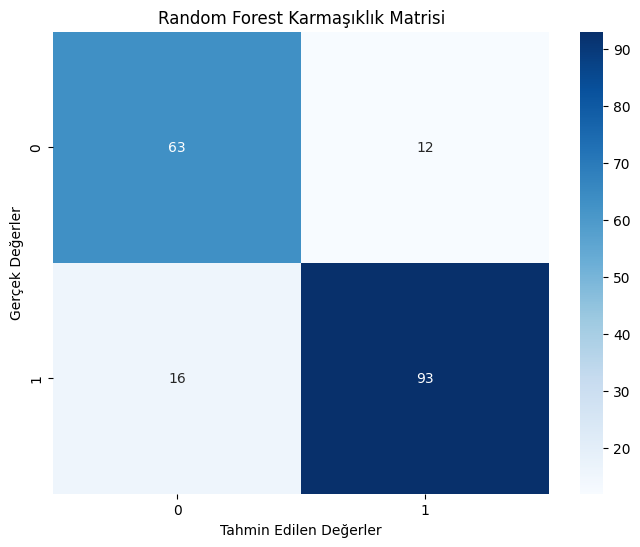


Logistic Regression Sonu√ßlarƒ±:
Doƒüruluk: 0.8043

Sƒ±nƒ±flandƒ±rma Raporu:
              precision    recall  f1-score   support

           0       0.72      0.84      0.78        75
           1       0.88      0.78      0.83       109

    accuracy                           0.80       184
   macro avg       0.80      0.81      0.80       184
weighted avg       0.81      0.80      0.81       184



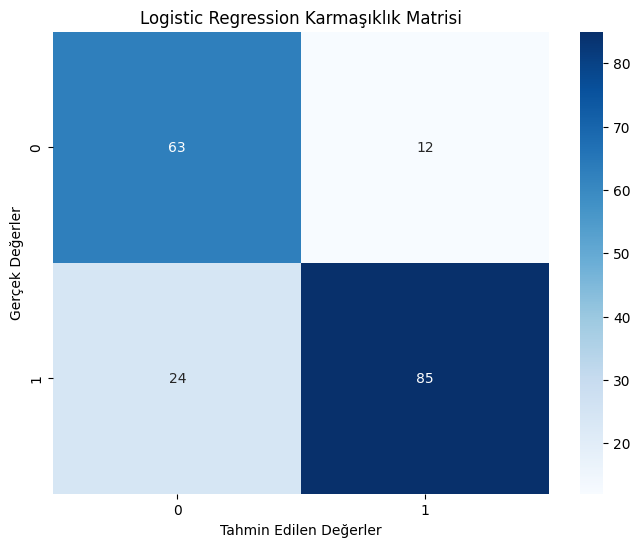


SVM Sonu√ßlarƒ±:
Doƒüruluk: 0.8424

Sƒ±nƒ±flandƒ±rma Raporu:
              precision    recall  f1-score   support

           0       0.78      0.85      0.82        75
           1       0.89      0.83      0.86       109

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.85      0.84      0.84       184



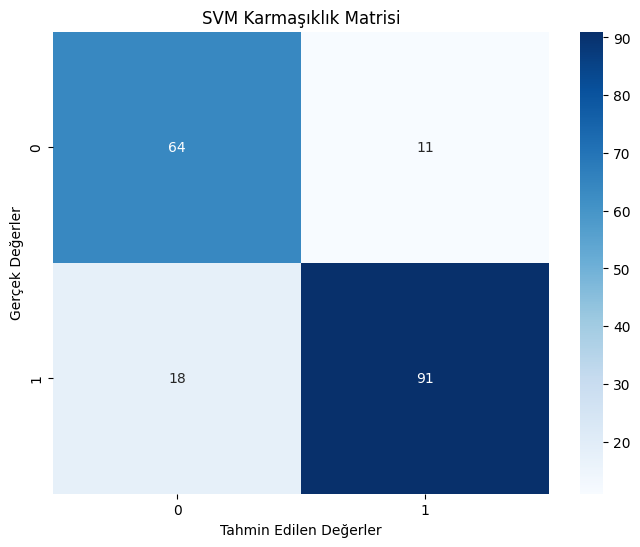


KNN Sonu√ßlarƒ±:
Doƒüruluk: 0.8207

Sƒ±nƒ±flandƒ±rma Raporu:
              precision    recall  f1-score   support

           0       0.76      0.81      0.79        75
           1       0.87      0.83      0.85       109

    accuracy                           0.82       184
   macro avg       0.81      0.82      0.82       184
weighted avg       0.82      0.82      0.82       184



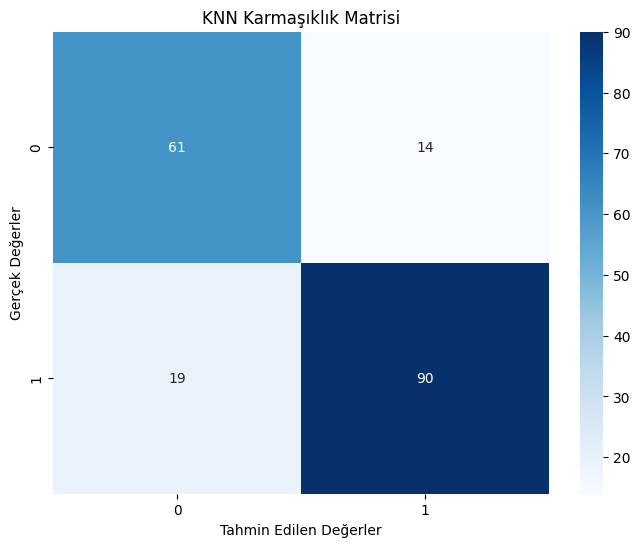


XGBoost Sonu√ßlarƒ±:
Doƒüruluk: 0.8315

Sƒ±nƒ±flandƒ±rma Raporu:
              precision    recall  f1-score   support

           0       0.78      0.83      0.80        75
           1       0.88      0.83      0.85       109

    accuracy                           0.83       184
   macro avg       0.82      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184



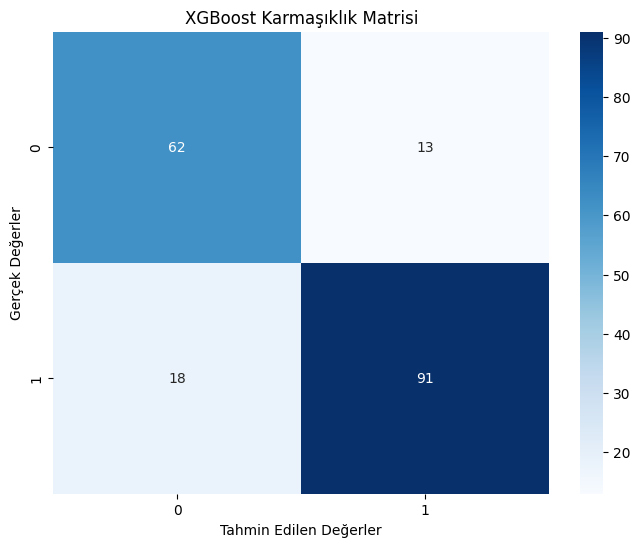


CatBoost Sonu√ßlarƒ±:
Doƒüruluk: 0.8478

Sƒ±nƒ±flandƒ±rma Raporu:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        75
           1       0.89      0.84      0.87       109

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.85      0.85       184



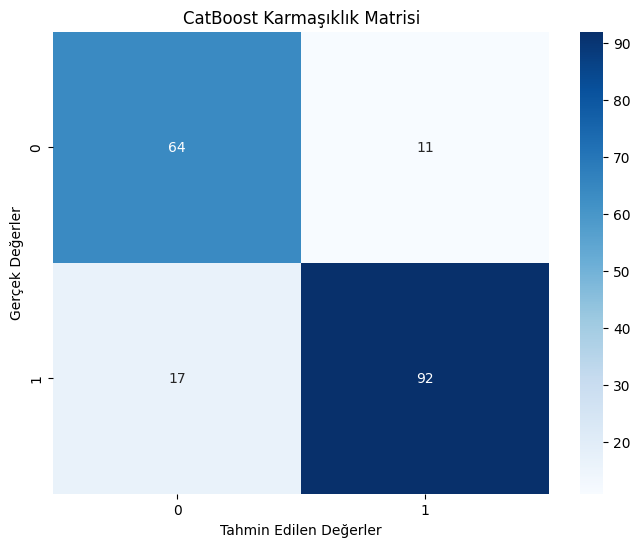

In [ ]:
# Modelleri eƒüitme ve deƒüerlendirme
results = {}
for name, model in models.items():
    # Model eƒüitimi
    model.fit(X_train, y_train)

    # Tahminler
    y_pred = model.predict(X_test)

    # Sonu√ßlarƒ± kaydetme
    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

    print(f"\n{name} Sonu√ßlarƒ±:")
    print(f"Doƒüruluk: {results[name]['accuracy']:.4f}")
    print("\nSƒ±nƒ±flandƒ±rma Raporu:")
    print(results[name]['classification_report'])

    # Karma≈üƒ±klƒ±k matrisini g√∂rselle≈ütirme
    plt.figure(figsize=(8, 6))
    sns.heatmap(results[name]['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Karma≈üƒ±klƒ±k Matrisi')
    plt.ylabel('Ger√ßek Deƒüerler')
    plt.xlabel('Tahmin Edilen Deƒüerler')
    plt.show()

## Kƒ±sa Performans √ñzeti (Doƒüruluk & F1-Skor)

| Model               | Doƒüruluk | F1-Skor (Sƒ±nƒ±f 1) | Yorum |
|---------------------|----------|-------------------|-------|
| ü•á **CatBoost**      | 0.8478   | **0.87**          | En y√ºksek F1, g√º√ßl√º denge; sƒ±nƒ±f 1‚Äôi iyi tanƒ±yor. |
| ü•á **Random Forest** | 0.8478   | 0.87              | CatBoost‚Äôa √ßok yakƒ±n; benzer ba≈üarƒ± ve a√ßƒ±klanabilirlik. |
| ü•à **SVM**           | 0.8424   | 0.86              | ƒ∞yi genelleme, sƒ±nƒ±f 1‚Äôde ba≈üarƒ±lƒ±. |
| ü•â **XGBoost**       | 0.8315   | 0.85              | Dengeli performans, d√º≈ü√ºk farkla geride. |
| 4Ô∏è‚É£ **KNN**          | 0.8207   | 0.85              | Beklenenden iyi; sƒ±nƒ±f 1‚Äôi iyi ayƒ±rt ediyor. |
| 5Ô∏è‚É£ **Logistic Reg.**| 0.8043   | 0.83              | En d√º≈ü√ºk doƒüruluk; yine de sƒ±nƒ±f 1 i√ßin fena deƒüil. |

### Genel Yorum:
- **CatBoost ve Random Forest** hem doƒüruluk hem F1 a√ßƒ±sƒ±ndan √∂nde.
- **SVM ve XGBoost** g√º√ßl√º alternatifler, aradaki farklar k√º√ß√ºk.
- **KNN**, basit bir model olmasƒ±na raƒümen olduk√ßa iyi sonu√ß vermi≈ü.
- **Logistic Regression**, temel ama g√º√ßl√º bir ba≈ülangƒ±√ß modeli; en d√º≈ü√ºk doƒüruluƒüa sahip.


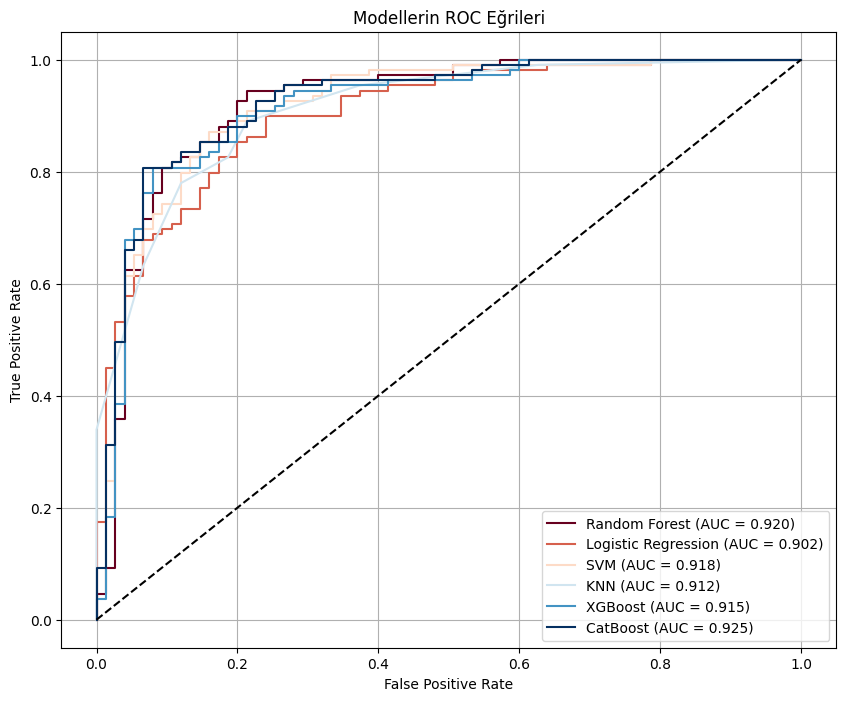

In [ ]:
plt.figure(figsize=(10, 8))

colors = plt.cm.RdBu(np.linspace(0, 1, len(models)))

for (name, model), color in zip(models.items(), colors):
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_scores = model.decision_function(X_test)
    else:
        print(f"{name} i√ßin ROC AUC √ßizilemiyor.")
        continue

    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    auc_score = roc_auc_score(y_test, y_scores)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.3f})', color=color)

plt.plot([0, 1], [0, 1], 'k--')  # Rastgele tahmin √ßizgisi
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Modellerin ROC Eƒürileri')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## ROC Grafiƒüinin Ayrƒ±ntƒ±lƒ± Okumasƒ±  



| FPR‚ÄØAralƒ±ƒüƒ± / √ñzellik | G√∂zlem | Neden √ñnemli? | Kim √ñnde? |
|------------------------|--------|---------------|-----------|
| **0 ‚Äì 0.05‚ÄØFPR**<br>(‚ÄúHatalarƒ± neredeyse sƒ±fƒ±r‚Äù b√∂lgesi) | √áizgiler hemen yukarƒ± fƒ±rlƒ±yorsa model **erken** doƒüru yakalama yapƒ±yor. | Tƒ±p, dolandƒ±rƒ±cƒ±lƒ±k gibi *yanlƒ±≈ü alarmƒ±n tolere edilemediƒüi* alanlarda kritik. | **CatBoost**, **SVM** ve **Random‚ÄØForest** ‚âà‚ÄØ%70‚Äë80‚ÄØTPR‚Äôye ula≈üƒ±yor.<br>Logistic‚ÄØRegression ‚âà‚ÄØ%55, KNN ‚âà‚ÄØ%45. |
| **0.05 ‚Äì 0.20‚ÄØFPR**<br>(D√º≈ü√ºk‚Äëorta risk) | Eƒürilerin eƒüimi yava≈ülƒ±yor. | √áoƒüu i≈ü senaryosunda optimum e≈üik genelde bu aralƒ±kta se√ßilir. | **CatBoost** h√¢l√¢ en √ºstte; **XGBoost** hemen arkasƒ±nda. Logistic eƒürisi diƒüerlerinin olduk√ßa altƒ±nda. |
| **> 0.20‚ÄØFPR**<br>(FP maliyeti d√º≈ü√ºkse) | Eƒüriler birbirine yakla≈üƒ±yor, TPR ‚âà‚ÄØ1‚Äôe yaslanƒ±yor. | Pazarlama kampanyalarƒ± gibi **FP**‚Äônin maliyeti d√º≈ü√ºk alanlarda tercih edilir. | Model farkƒ± hƒ±zla kapanƒ±r; 0.30‚ÄØFPR‚Äôden sonra performanslar neredeyse e≈üit. |



- **Eƒürinin P√ºr√ºzl√ºl√ºƒü√º** : KNN √ßizgisi **merdiven basamaklƒ±**, Logistic √ßok **p√ºr√ºzs√ºz**.

---

## ROC‚ÄìAUC Eƒürilerinin Performans Yorumu (Kƒ±sa)

| Sƒ±ra | Model | AUC | Performans Yorumu |
|------|-------|-----|-------------------|
| ü•á | **CatBoost** | **0.925** | En iyi genel performans, her FPR aralƒ±ƒüƒ±nda √ºst√ºn. |
| ü•à | **Random Forest** | 0.920 | Dengeli ve a√ßƒ±klanabilir; erken FPR‚Äôde g√º√ßl√º. |
| ü•â | **SVM** | 0.918 | Y√ºksek TPR; doƒürusal olmayan desenlerde etkili. |
| 4 | **XGBoost** | 0.915 | Hƒ±zlƒ± ve √∂l√ßeklenebilir; k√º√ß√ºk farkla geride. |
| 5 | **KNN** | 0.912 | Basit ama y√ºksek boyutta performansƒ± d√º≈üebilir. |
| 6 | **Logistic Regression** | 0.902 | En d√º≈ü√ºk AUC; hƒ±zlƒ± ve a√ßƒ±klanabilir model. |


---

## ≈ûekil Sayƒ±larƒ± ve Genel Deƒüerlendirme

- **AUC Aralƒ±ƒüƒ±:** `0.902 ‚Äì 0.925` ‚Üí T√ºm modeller rastgele tahminden (0.5) √ßok daha ba≈üarƒ±lƒ±.
- **Erken Yakalama (FPR ‚â§ 0.05):** **CatBoost**, **Random Forest**, **SVM** modelleri %70'in √ºzerinde TPR ile hƒ±zlƒ± doƒüru tahmin yapabiliyor.
- **ƒ∞stikrarlƒ± Olasƒ±lƒ±k Tahmini:** **CatBoost** ve **XGBoost** √ßizgileri d√ºzg√ºn ilerliyor ‚Äì bu da daha g√ºvenilir tahmin olasƒ±lƒ±klarƒ± sunduklarƒ±nƒ± g√∂steriyor.
- **Basamaklƒ± √áizgiler:** **KNN** ve **Random Forest**‚Äôta tahminlerde sƒ±√ßramalar g√∂r√ºl√ºyor ‚Äì bu, test verisinin az olmasƒ± veya karar yapƒ±sƒ±nƒ±n sƒ±nƒ±rlƒ± olmasƒ±ndan kaynaklanabilir.

> ### **En ƒ∞yi Performans Kime Ait?**
> - **Genel Ba≈üarƒ±:** ü•á **CatBoost** ‚Äì En y√ºksek ayrƒ±≈ütƒ±rma (AUC 0.925)
> - **Erken Tahmin Yeteneƒüi:** **CatBoost ‚âà Random Forest ‚âà SVM**
> - **Basit ve G√ºvenilir Ba≈ülangƒ±√ß Modeli:** **Logistic Regression**
> - **Veri Hazƒ±rlƒ±ƒüƒ± Kolay Gerektirenler:** **KNN**, **Logistic Regression**



In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

# √áoƒüunluk sƒ±nƒ±fƒ± (baseline) doƒüruluƒüunu hesapla
majority_acc = np.max(np.bincount(y_train)) / len(y_train)

for name, model in models.items():
    model.fit(X_train, y_train)

    train_acc = model.score(X_train, y_train)
    test_acc  = model.score(X_test,  y_test)

    print(f"{name} Modeli:")
    print(f" - Eƒüitim Doƒüruluƒüu: {train_acc:.4f}")
    print(f" - Test   Doƒüruluƒüu: {test_acc:.4f}")

    # --- Overfitting kontrol√º ---
    if train_acc - test_acc > 0.10:
        print("  ‚ö†Ô∏è Overfitting belirtisi olabilir! (Eƒüitim √ßok y√ºksek)")

    # --- Underfitting kontrol√º (se√ß¬†1: sabit e≈üik) ---
    elif (train_acc < 0.70) and (test_acc < 0.70):
        print("  ‚ö†Ô∏è Underfitting olabilir! (Her iki doƒüruluk da d√º≈ü√ºk)")

    # --- Underfitting kontrol√º (se√ß¬†2: baseline‚Äôa g√∂re) ---
    elif (train_acc < majority_acc + 0.05):
        print("  ‚ö†Ô∏è Underfitting olabilir! (Eƒüitim doƒüruluƒüu baseline‚Äôa √ßok yakƒ±n)")

    else:
        print("  ‚úîÔ∏è √ñnemli bir overfitting/underfitting belirtisi yok.")

    print()


Random Forest Modeli:
 - Eƒüitim Doƒüruluƒüu: 0.8804
 - Test   Doƒüruluƒüu: 0.8478
  ‚úîÔ∏è √ñnemli bir overfitting/underfitting belirtisi yok.

Logistic Regression Modeli:
 - Eƒüitim Doƒüruluƒüu: 0.8356
 - Test   Doƒüruluƒüu: 0.8043
  ‚úîÔ∏è √ñnemli bir overfitting/underfitting belirtisi yok.

SVM Modeli:
 - Eƒüitim Doƒüruluƒüu: 0.8940
 - Test   Doƒüruluƒüu: 0.8424
  ‚úîÔ∏è √ñnemli bir overfitting/underfitting belirtisi yok.

KNN Modeli:
 - Eƒüitim Doƒüruluƒüu: 0.8465
 - Test   Doƒüruluƒüu: 0.8207
  ‚úîÔ∏è √ñnemli bir overfitting/underfitting belirtisi yok.

XGBoost Modeli:
 - Eƒüitim Doƒüruluƒüu: 0.8886
 - Test   Doƒüruluƒüu: 0.8315
  ‚úîÔ∏è √ñnemli bir overfitting/underfitting belirtisi yok.

CatBoost Modeli:
 - Eƒüitim Doƒüruluƒüu: 0.9008
 - Test   Doƒüruluƒüu: 0.8478
  ‚úîÔ∏è √ñnemli bir overfitting/underfitting belirtisi yok.



### Overfiting - Underfitting Ele Alƒ±nmasƒ±
---
Resimde g√∂r√ºld√ºƒü√º √ºzere RF ve Boosting Algoritmalarƒ± gibi g√º√ßl√º ensemble y√∂ntemlerde ilk ba≈üta overfiting g√∂r√ºld√º.

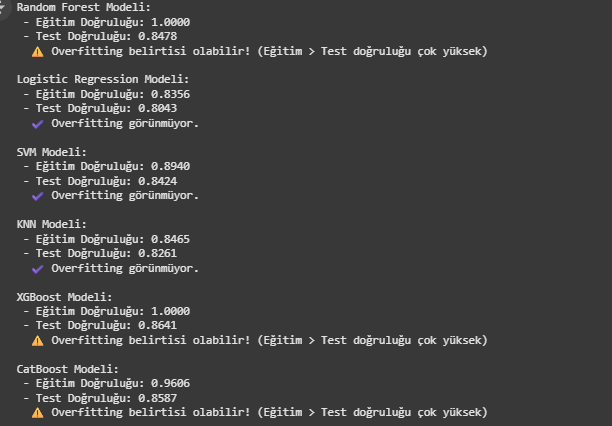
- **Overfitting**, √∂zellikle **aƒüa√ß tabanlƒ± & boosting** algoritmalarƒ±nda (RF, XGBoost, CatBoost) *ilk konfig√ºrasyonda* belirdi; hiperparametre ayarƒ±yla baskƒ±landƒ±.
- **Underfitting** hi√ßbir modelde g√∂r√ºlmedi; t√ºm modeller eƒüitim setini makul √∂l√ß√ºde √∂ƒürendi.
- ROC‚ÄëAUC deƒüerleri de doƒüruluk trendini destekliyor; sƒ±nƒ±flar dengeli olduƒüu i√ßin ek dengeleme yapƒ±lmadƒ±.

In [ ]:
# En iyi 3 modeli bulma
top3_models = sorted(
    results.items(),
    key=lambda x: x[1]['accuracy'],
    reverse=True
)[:3]                      # ilk 3'√º al

print("\nEn iyi 3 model:")
for rank, (model_name, metrics) in enumerate(top3_models, 1):
    print(f"{rank}. {model_name} ‚Üí Accuracy: {metrics['accuracy']:.4f}")



En iyi 3 model:
1. Random Forest ‚Üí Accuracy: 0.8478
2. CatBoost ‚Üí Accuracy: 0.8478
3. SVM ‚Üí Accuracy: 0.8424


In [ ]:
# Hiper parametre grid'lerini tanƒ±mlama
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'SVM': {
        'svm__C': [0.1, 1, 10],
        'svm__kernel': ['rbf', 'linear'],
        'svm__gamma': ['scale', 'auto', 0.1, 1]
    },
    'KNN': {
        'knn__n_neighbors': [3, 5, 7, 9],
        'knn__weights': ['uniform', 'distance'],
        'knn__metric': ['euclidean', 'manhattan']
    },
    'XGBoost': {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.15],
        'subsample': [0.8, 0.9, 1.0]
    },
    'CatBoost': {
        'iterations': [100, 200, 300],
        'depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'l2_leaf_reg': [1, 3, 5]
    },
    'Logistic Regression': {
        'logreg__penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'logreg__C': [0.01, 0.1, 1, 10],
        'logreg__solver': ['lbfgs', 'liblinear', 'saga'],
        'logreg__max_iter': [100, 200, 500],
        # l1_ratio sadece solver='saga' ve penalty='elasticnet' i√ßin kullanƒ±lƒ±r
        'logreg__l1_ratio': [0.5, None]
    }
}


In [ ]:
best_models = {}

for model_name, _ in top3_models:
    print(f"\n{model_name} i√ßin GridSearch ba≈ülatƒ±lƒ±yor...")

    model = models[model_name]
    param_grid = param_grids[model_name]

    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring='accuracy',
        cv=5,
        n_jobs=-1,
        verbose=2
    )

    grid_search.fit(X_train, y_train)

    print(f"En iyi parametreler: {grid_search.best_params_}")
    print(f"En iyi doƒüruluk: {grid_search.best_score_:.4f}")

    best_models[model_name] = grid_search.best_estimator_


Random Forest i√ßin GridSearch ba≈ülatƒ±lƒ±yor...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
En iyi parametreler: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
En iyi doƒüruluk: 0.8234

CatBoost i√ßin GridSearch ba≈ülatƒ±lƒ±yor...
Fitting 5 folds for each of 81 candidates, totalling 405 fits
En iyi parametreler: {'depth': 7, 'iterations': 100, 'l2_leaf_reg': 5, 'learning_rate': 0.01}
En iyi doƒüruluk: 0.8302

SVM i√ßin GridSearch ba≈ülatƒ±lƒ±yor...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
En iyi parametreler: {'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
En iyi doƒüruluk: 0.8248


##  GridSearch Denemesi
- GridSearch y√∂ntemiyle hiperparametre optimizasyonu ger√ßekle≈ütirildi; ancak yapƒ±lan parametre ayarlarƒ±na raƒümen model performansƒ±nda beklenen iyile≈üme saƒülanamadƒ±. Performansƒ±n artƒ±rƒ±lmasƒ± i√ßin parametre aralƒ±klarƒ±nƒ±n yeniden g√∂zden ge√ßirilmesi veya modele yeni √∂zelliklerin eklenmesi gibi farklƒ± stratejilerin uygulanmasƒ± gerekmektedir. Bu doƒürultuda, model ba≈üarƒ±sƒ±nƒ± y√ºkseltmek amacƒ±yla √ße≈üitli hiperparametre kombinasyonlarƒ± ve geli≈ümi≈ü √∂zellik m√ºhendisliƒüi tekniklerinin uygulanmasƒ± √∂nerilmektedir.

In [ ]:
data = [
    {"alg": "RandomForest",
     "precision_0": 0.80, "precision_1": 0.89,
     "recall_0": 0.84, "recall_1": 0.84,
     "f1_0": 0.82, "f1_1": 0.87,
     "accuracy": 0.8478},

    {"alg": "LogisticRegression",
     "precision_0": 0.72, "precision_1": 0.88,
     "recall_0": 0.84, "recall_1": 0.78,
     "f1_0": 0.78, "f1_1": 0.83,
     "accuracy": 0.8043},

    {"alg": "SVM",
     "precision_0": 0.78, "precision_1": 0.89,
     "recall_0": 0.85, "recall_1": 0.83,
     "f1_0": 0.82, "f1_1": 0.86,
     "accuracy": 0.8424},

    {"alg": "KNN",
     "precision_0": 0.76, "precision_1": 0.87,
     "recall_0": 0.81, "recall_1": 0.83,
     "f1_0": 0.79, "f1_1": 0.85,
     "accuracy": 0.8207},

    {"alg": "XGBoost",
     "precision_0": 0.78, "precision_1": 0.88,
     "recall_0": 0.83, "recall_1": 0.83,
     "f1_0": 0.80, "f1_1": 0.85,
     "accuracy": 0.8315},

    {"alg": "CatBoost",
     "precision_0": 0.79, "precision_1": 0.89,
     "recall_0": 0.85, "recall_1": 0.84,
     "f1_0": 0.82, "f1_1": 0.87,
     "accuracy": 0.8478}
]



df_macro = pd.DataFrame(data)

# Sƒ±nƒ±f bazƒ±ndaki precision, recall, f1 skorlarƒ±nƒ±n ortalamasƒ±nƒ± (makro ortalama) hesapla
df_macro['precision_macro'] = (df_macro['precision_0'] + df_macro['precision_1']) / 2
df_macro['recall_macro'] = (df_macro['recall_0'] + df_macro['recall_1']) / 2
df_macro['f1_macro'] = (df_macro['f1_0'] + df_macro['f1_1']) / 2

# T√ºm algoritmalarƒ±n ortalama metrikleri
ortalama_precision = df_macro['precision_macro'].mean()
ortalama_recall = df_macro['recall_macro'].mean()
ortalama_f1 = df_macro['f1_macro'].mean()
ortalama_accuracy = df_macro['accuracy'].mean()

print(f"Ortalama Precision (Makro): {ortalama_precision:.3f}")
print(f"Ortalama Recall (Makro): {ortalama_recall:.3f}")
print(f"Ortalama F1-Score (Makro): {ortalama_f1:.3f}")
print(f"Ortalama Accuracy: {ortalama_accuracy:.3f}")



Ortalama Precision (Makro): 0.828
Ortalama Recall (Makro): 0.831
Ortalama F1-Score (Makro): 0.830
Ortalama Accuracy: 0.832


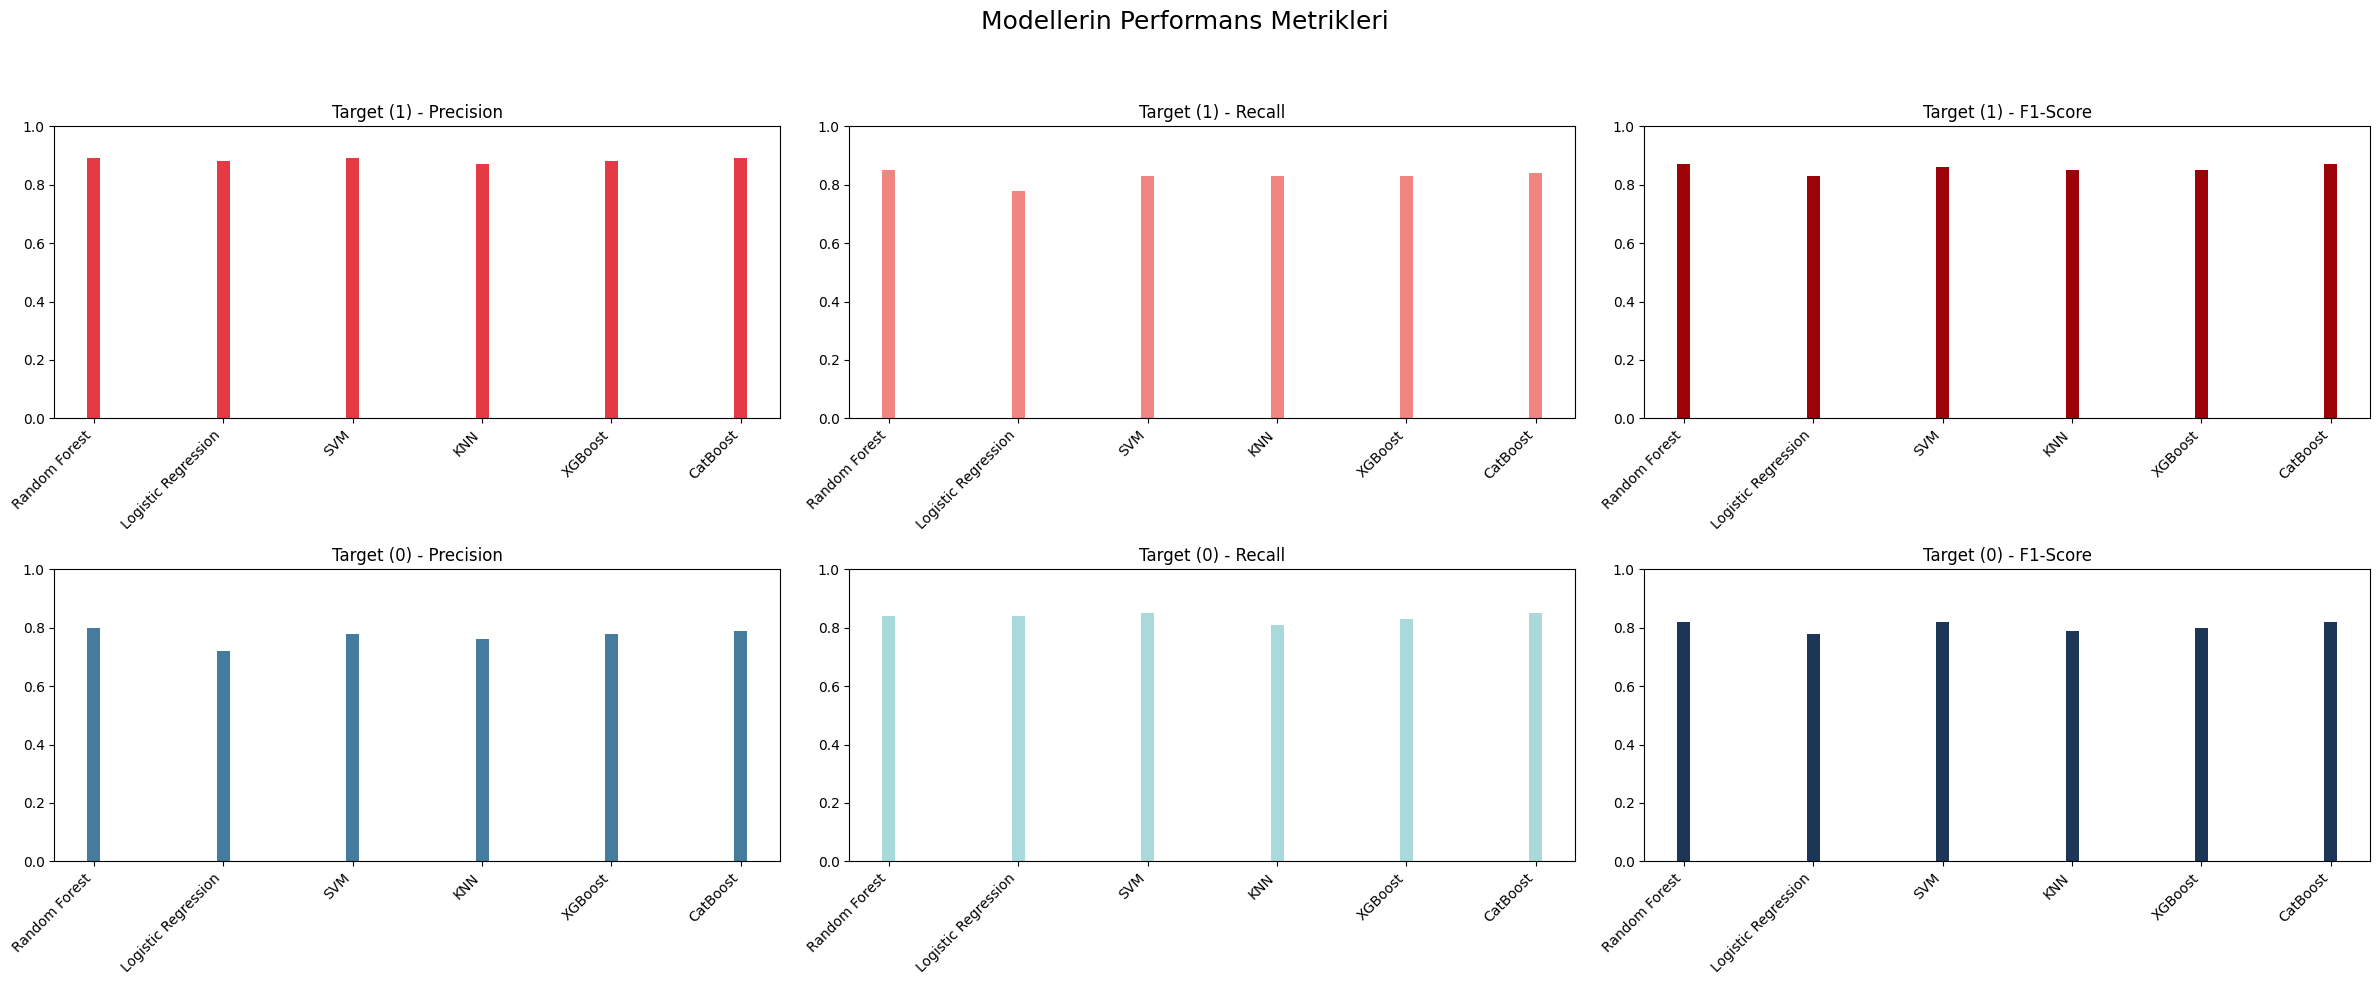

In [ ]:
# Modeller
models = [
    'Random Forest',
    'Logistic Regression',
    'SVM',
    'KNN',
    'XGBoost',
    'CatBoost'
]

# === Performans metrikleri ===
# Target (1) sƒ±nƒ±fƒ±
precision_1 = [0.89, 0.88, 0.89, 0.87, 0.88, 0.89]
recall_1    = [0.85, 0.78, 0.83, 0.83, 0.83, 0.84]
f1_1        = [0.87, 0.83, 0.86, 0.85, 0.85, 0.87]

# Target (0) sƒ±nƒ±fƒ±
precision_0 = [0.80, 0.72, 0.78, 0.76, 0.78, 0.79]
recall_0    = [0.84, 0.84, 0.85, 0.81, 0.83, 0.85]
f1_0        = [0.82, 0.78, 0.82, 0.79, 0.80, 0.82]


# === Grafik ayarlarƒ± ===
bar_width = 0.10
indices = np.arange(len(models))

fig, axs = plt.subplots(2, 3, figsize=(24, 10))
fig.suptitle('Modellerin Performans Metrikleri', fontsize=18)

# ---------- Target (1) - Kƒ±rmƒ±zƒ± Tonlarƒ± ----------
axs[0, 0].bar(indices, precision_1, width=bar_width, color='#e63946')  # koyu kƒ±rmƒ±zƒ±
axs[0, 0].set_title('Target (1) - Precision')
axs[0, 0].set_xticks(indices)
axs[0, 0].set_xticklabels(models, rotation=45, ha='right')
axs[0, 0].set_ylim(0, 1)

axs[0, 1].bar(indices, recall_1, width=bar_width, color='#f28482')  # a√ßƒ±k kƒ±rmƒ±zƒ±
axs[0, 1].set_title('Target (1) - Recall')
axs[0, 1].set_xticks(indices)
axs[0, 1].set_xticklabels(models, rotation=45, ha='right')
axs[0, 1].set_ylim(0, 1)

axs[0, 2].bar(indices, f1_1, width=bar_width, color='#9d0208')  # koyu bordo
axs[0, 2].set_title('Target (1) - F1‚ÄëScore')
axs[0, 2].set_xticks(indices)
axs[0, 2].set_xticklabels(models, rotation=45, ha='right')
axs[0, 2].set_ylim(0, 1)

# ---------- Target (0) - Mavi Tonlarƒ± ----------
axs[1, 0].bar(indices, precision_0, width=bar_width, color='#457b9d')  # koyu mavi
axs[1, 0].set_title('Target (0) - Precision')
axs[1, 0].set_xticks(indices)
axs[1, 0].set_xticklabels(models, rotation=45, ha='right')
axs[1, 0].set_ylim(0, 1)

axs[1, 1].bar(indices, recall_0, width=bar_width, color='#a8dadc')  # a√ßƒ±k mavi
axs[1, 1].set_title('Target (0) - Recall')
axs[1, 1].set_xticks(indices)
axs[1, 1].set_xticklabels(models, rotation=45, ha='right')
axs[1, 1].set_ylim(0, 1)

axs[1, 2].bar(indices, f1_0, width=bar_width, color='#1d3557')  # koyu lacivert
axs[1, 2].set_title('Target (0) - F1‚ÄëScore')
axs[1, 2].set_xticks(indices)
axs[1, 2].set_xticklabels(models, rotation=45, ha='right')
axs[1, 2].set_ylim(0, 1)

plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()


- Precision (0 i√ßin): En y√ºksek Random Forest (%0.80) ve CatBoost (%0.79) arasƒ±nda.

- Recall (0 i√ßin): En y√ºksek CatBoost ve Svm (%0.85 ) - Logistic Regression vw Random Forest (%0.84).
- F1-Score (0 i√ßin): En y√ºksek CatBoost, SVM ve Random Forest (%0.82). Aynƒ± deƒüere sahipler..

- Precision (1 i√ßin): En y√ºksek Random Forest, SVM ve CatBoost (hepsi %0.89).

- Recall (1 i√ßin): En y√ºksek Random Forest (%0.85).

- F1-Score (1 i√ßin): En y√ºksek Random Forest ve CatBoost (%0.87).

Random‚ÄØForest istikrarlƒ± bi√ßimde √∂ne √ßƒ±kƒ±yor: target‚ÄØ1 i√ßin hem recall, hem precision hem F1‚Äôde zirvede; target‚ÄØ0‚Äôda da precision, recall ve F1‚Äôde lider / ortak lider.

CatBoost √∂zellikle dengeli: target‚ÄØ0‚Äôda recall ve F1‚Äôde zirvede, target‚ÄØ1‚Äôde precision ve F1‚Äôde Random‚ÄØForest liderliƒüi payla≈üƒ±yor.

SVM belirli metriklerde (√∂zellikle recall‚Äë0 ve precision‚Äë1) CatBoost‚Äôla birlikte √∂ne √ßƒ±kƒ±yor, ama F1‚Äë1‚Äôde yarƒ±m adƒ±m geride kalƒ±yor.

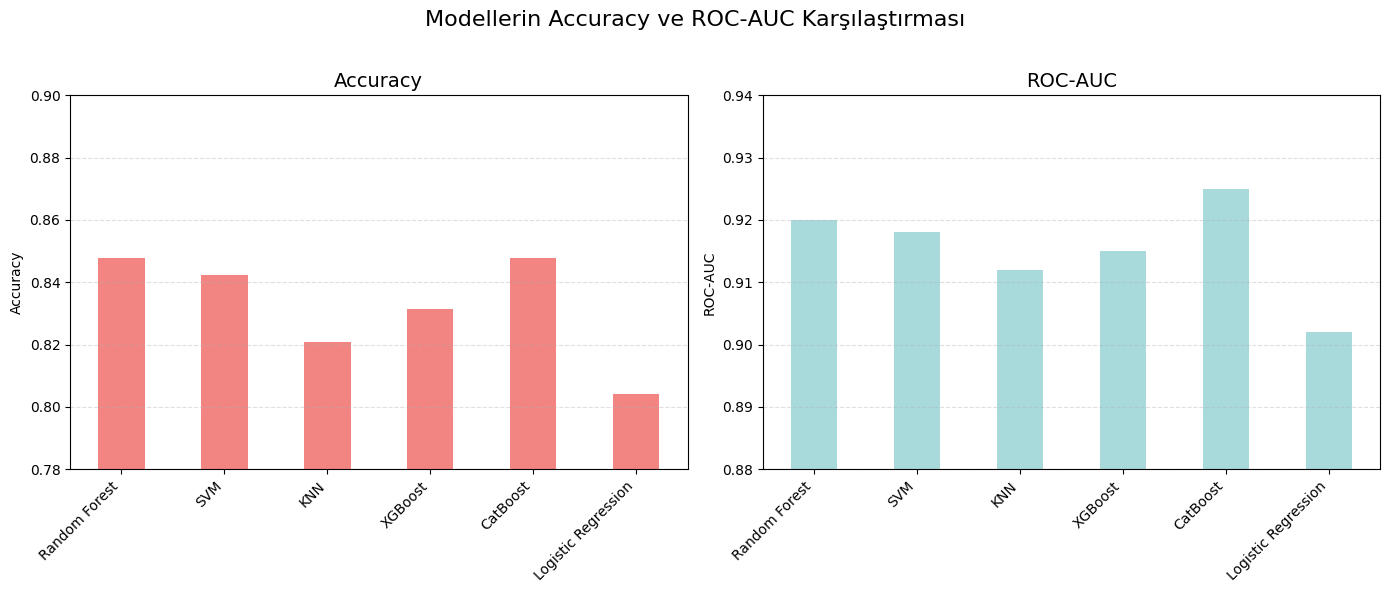

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Modeller
models = [
    'Random Forest',
    'SVM',
    'KNN',
    'XGBoost',
    'CatBoost',
    'Logistic Regression'
]

# Accuracy skorlarƒ±
accuracy = [
    0.8478,  # Random Forest
    0.8424,  # SVM
    0.8207,  # KNN
    0.8315,  # XGBoost
    0.8478,  # CatBoost
    0.8043   # Logistic Regression
]


# ROC‚ÄëAUC skorlarƒ±
auc_scores = [
    0.920,  # Random Forest
    0.918,  # SVM
    0.912,  # KNN
    0.915,  # XGBoost
    0.925,  # CatBoost
    0.902   # Logistic Regression
]

# Grafik ayarlarƒ±
bar_width = 0.45
indices = np.arange(len(models))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Modellerin Accuracy ve ROC‚ÄëAUC Kar≈üƒ±la≈ütƒ±rmasƒ±', fontsize=16)

# --- Accuracy ---
ax1.bar(indices, accuracy, width=bar_width, color='#f28482')
ax1.set_title('Accuracy', fontsize=14)
ax1.set_xticks(indices)
ax1.set_xticklabels(models, rotation=45, ha='right')
ax1.set_ylim(0.78, 0.90)
ax1.set_ylabel('Accuracy')
ax1.grid(axis='y', linestyle='--', alpha=0.4)

# --- ROC‚ÄëAUC ---
ax2.bar(indices, auc_scores, width=bar_width, color='#a8dadc')
ax2.set_title('ROC‚ÄëAUC', fontsize=14)
ax2.set_xticks(indices)
ax2.set_xticklabels(models, rotation=45, ha='right')
ax2.set_ylim(0.88, 0.94)
ax2.set_ylabel('ROC‚ÄëAUC')
ax2.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## Genel Performans Analizi
 (Accuracy ve ROC-AUC):

- Accuracy a√ßƒ±sƒ±ndan: Random Forest ve CatBoost en y√ºksek doƒüruluk oranlarƒ±na sahip.
- ROC-AUC a√ßƒ±sƒ±ndan: CatBoost a√ßƒ±k ara en iyi performansƒ± g√∂steriyor (0.925), bunu Random Forest ve SVM takip ediyor
- Logistic Regression her iki metrikte de en d√º≈ü√ºk performansƒ± sergiliyor.

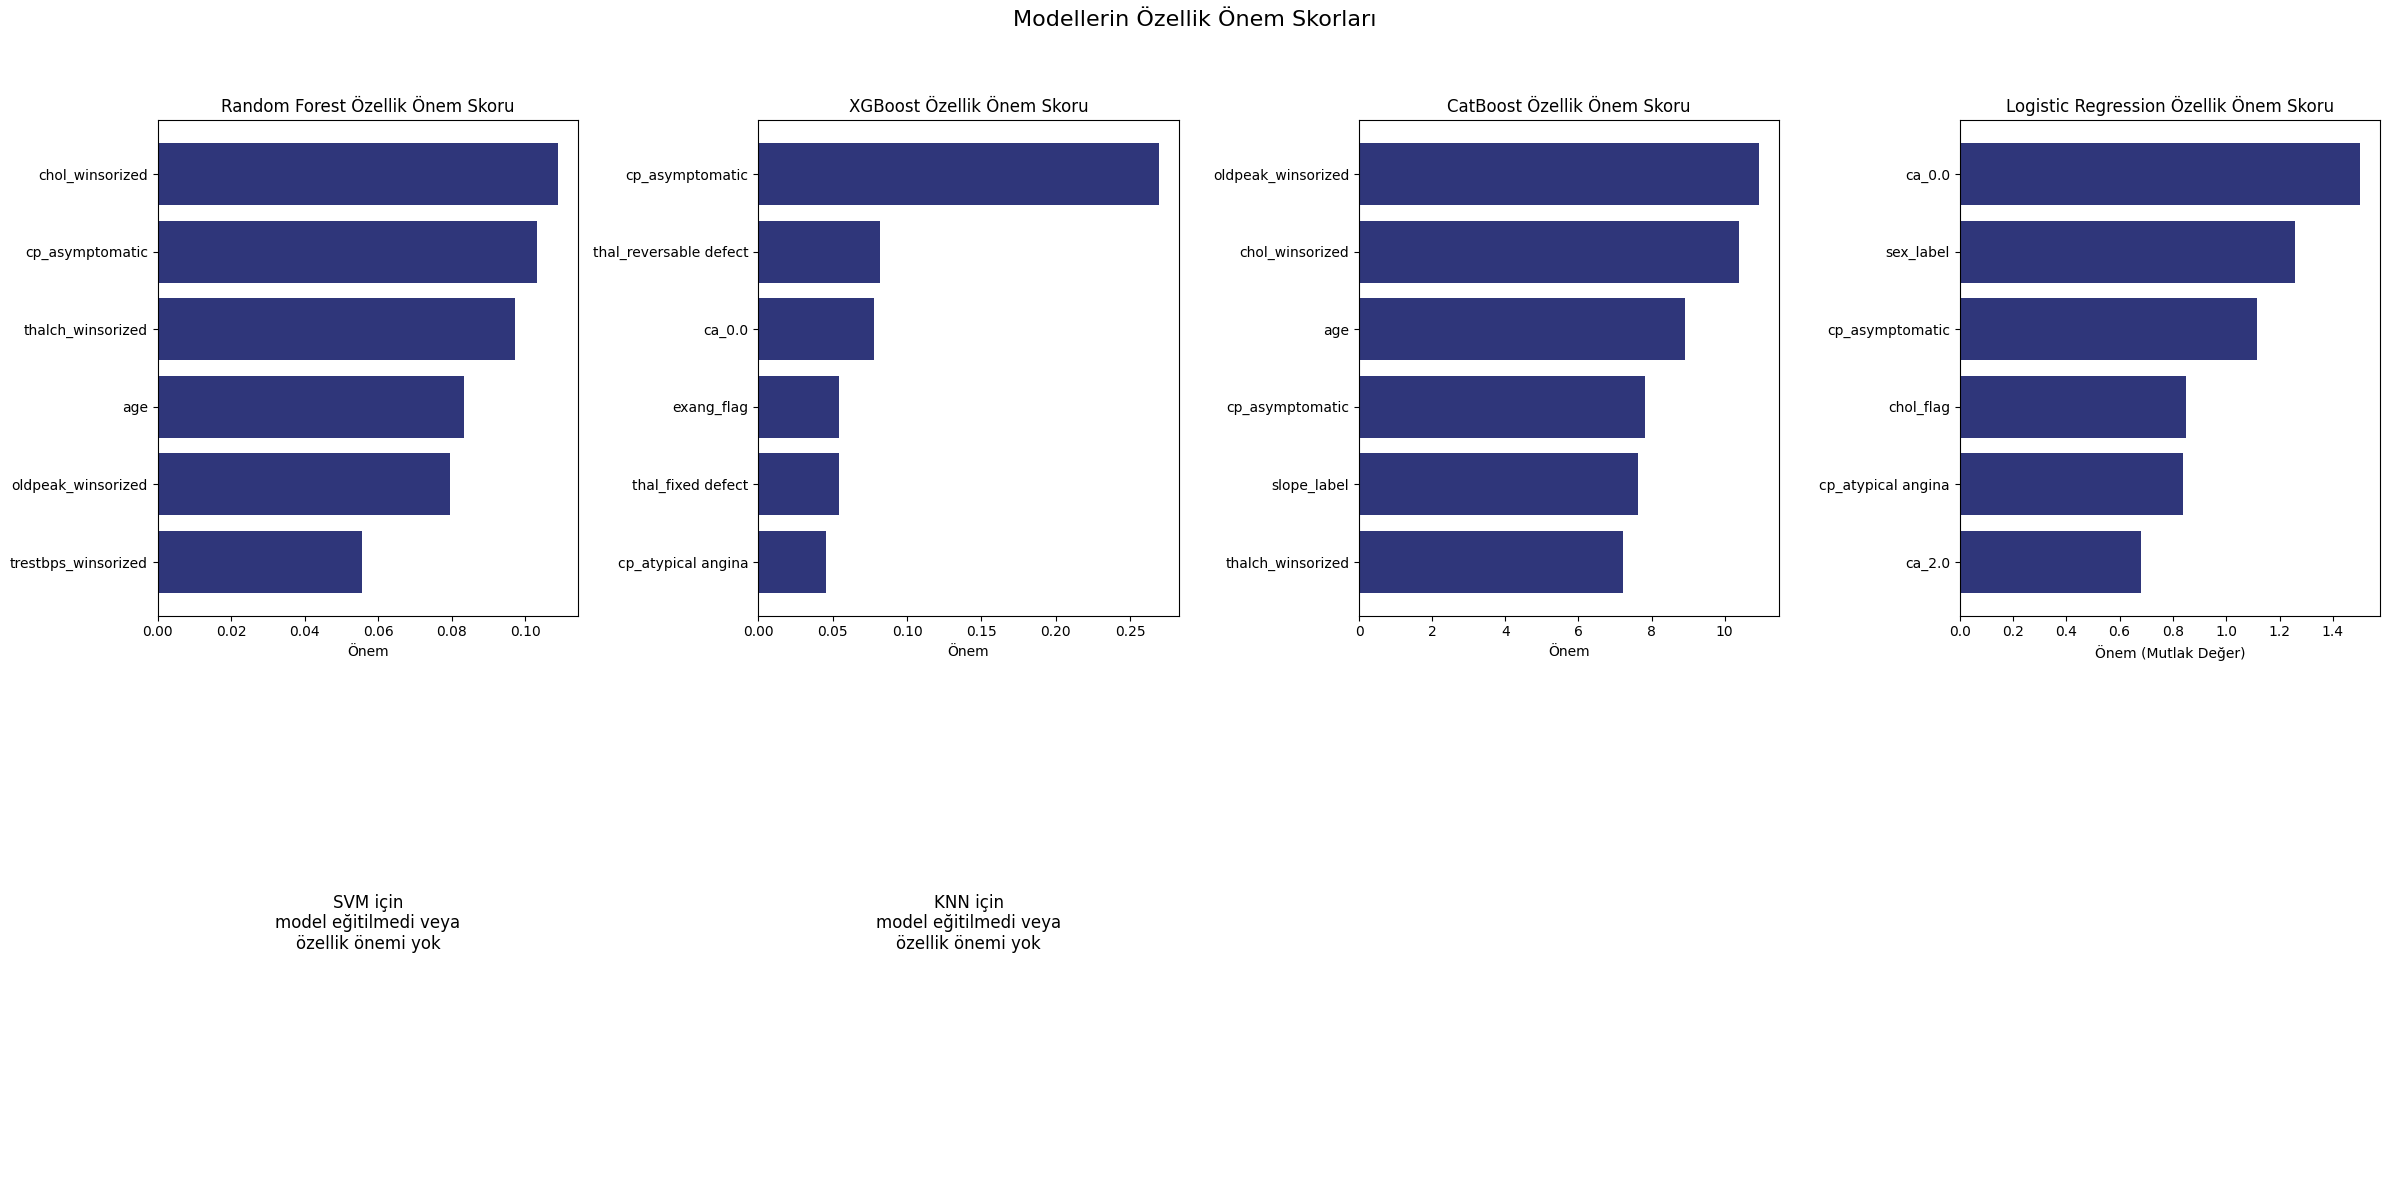

In [ ]:
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'SVM': None,  # √ñzellik √∂nemi yok
    'KNN': None   # √ñzellik √∂nemi yok
}

fig, axs = plt.subplots(2, 4, figsize=(24, 12))
fig.suptitle('Modellerin √ñzellik √ñnem Skorlarƒ±', fontsize=16)
axs = axs.flatten()

for i, (name, model) in enumerate(models.items()):
    ax = axs[i]
    if model is not None:
        model.fit(X_train, y_train)
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
            feat_imp = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
            feat_imp = feat_imp.sort_values(by='Importance', ascending=False).head(6)
            ax.barh(feat_imp['Feature'], feat_imp['Importance'], color='#2f367a')
            ax.invert_yaxis()
            ax.set_title(f"{name} √ñzellik √ñnem Skoru")
            ax.set_xlabel("√ñnem")
        elif hasattr(model, 'coef_'):
            coef = model.coef_[0]
            feat_imp = pd.DataFrame({'Feature': X_train.columns, 'Importance': abs(coef)})
            feat_imp = feat_imp.sort_values(by='Importance', ascending=False).head(6)
            ax.barh(feat_imp['Feature'], feat_imp['Importance'], color='#2f367a')
            ax.invert_yaxis()
            ax.set_title(f"{name} √ñzellik √ñnem Skoru")
            ax.set_xlabel("√ñnem (Mutlak Deƒüer)")
        else:
            ax.text(0.5, 0.5, f"{name} i√ßin\n√∂zellik √∂nemi\nbulunmamaktadƒ±r",
                    ha='center', va='center', fontsize=12)
            ax.set_axis_off()
    else:
        ax.text(0.5, 0.5, f"{name} i√ßin\nmodel eƒüitilmedi veya\n√∂zellik √∂nemi yok",
                ha='center', va='center', fontsize=12)
        ax.set_axis_off()

for j in range(i+1, len(axs)):
    axs[j].set_axis_off()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



√ñne √áƒ±kan √ñzellikler:

chol_winsorized (kolesterol), cp_asymptomatic (g√∂ƒü√ºs aƒürƒ±sƒ± tipi), age (ya≈ü) gibi tƒ±bbi √∂zellikler √ßoƒüu modelde √∂nemli g√∂r√ºn√ºyor
Bu da kalp hastalƒ±ƒüƒ± veya benzer bir saƒülƒ±k durumu tahmini √ßalƒ±≈ümasƒ±nƒ± olduƒüunu √ßok net bir ≈üekilde g√∂zler √∂n√ºne seriyor..


Model Farklƒ±lƒ±klarƒ±:

Her model farklƒ± √∂zelliklere farklƒ± √∂nem veriyor
√ñrneƒüin, CatBoost'ta oldpeak_winsorized daha √∂nemli g√∂r√ºn√ºrken, Random Forest'ta chol_winsorized en √∂nemli.


SVM ve KNN: Bu modeller i√ßin √∂zellik √∂nemlerinin hesaplanmadƒ±, √ß√ºnk√º bu algoritmalar doƒüal olarak √∂zellik √∂nem skoru √ºretmez.

## Dipnot 1 ‚Äì Confusion Matrix Yorumlama:
| Model                 | TN | TP | FP | FN | Deƒüerlendirme                                                                                          |
|-----------------------|----|----|----|----|----------------------------------------------------------------------------------------------------------|
| **Random Forest**     | 63 | 93 | 12 | 16 | Dengeli sƒ±nƒ±flandƒ±rma; **d√º≈ü√ºk yanlƒ±≈ü negatif** oranƒ± kritik vakalarƒ± atlamayƒ± √∂nler.                    |
| **Logistic Regression** | 63 | 85 | 12 | 24 | Yanlƒ±≈ü negatif sayƒ±sƒ± y√ºksek; kalp krizi hastalarƒ±nƒ±n atlanma riski erken tanƒ± a√ßƒ±sƒ±ndan dezavantaj.     |
| **Support Vector Machine (SVM)** | 64 | 91 | 11 | 18 | Y√ºksek doƒüruluk ve dengeli hata oranlarƒ±yla g√ºvenilir performans.                                        |
| **XGBoost**           | 62 | 91 | 13 | 18 | FP deƒüeri diƒüer g√º√ßl√º modellerden biraz daha y√ºksek (13); yine de FN d√º≈ü√ºk ve genel doƒüruluk y√ºksek, saƒülam bir alternatif.                                |
| **CatBoost**          | 64 | 92 | 11  | 17 | 	SVM ile birlikte en d√º≈ü√ºk FP (11) ve d√º≈ü√ºk FN saƒülar; dengeli ve g√ºvenilir sƒ±nƒ±flandƒ±rma performansƒ±.          |
| **K‚ÄëNearest Neighbors (KNN)** | 61 | 90 | 14 | 19 | Genel olarak ba≈üarƒ±lƒ±, ancak diƒüer modellere kƒ±yasla biraz daha y√ºksek yanlƒ±≈ü pozitif/negatif deƒüerleri. |

---

Kalp krizi gibi hayati durumlarda yanlƒ±≈ü negatifleri (FN) en aza indirmek √ßok √∂nemlidir. Bu nedenle:

üîπ En iyi tercih: Random Forest
√á√ºnk√º en d√º≈ü√ºk FN (16) ve en y√ºksek recall (%85) deƒüerine sahip. Yani hasta olan ki≈üileri ka√ßƒ±rma olasƒ±lƒ±ƒüƒ± en d√º≈ü√ºk.

üî∏ Alternatif tercih: CatBoost
FN deƒüeri √ßok yakƒ±n (17) ve daha az yanlƒ±≈ü pozitif √ºretiyor. Eƒüer sistemde yanlƒ±≈ü alarm sayƒ±sƒ±nƒ± azaltmak da √∂nemliyse CatBoost tercih edilebilir.

√ñzetle:
Hasta ka√ßƒ±rmamak √∂ncelikse ‚Üí Random Forest

Yanlƒ±≈ü alarm da √∂nemliyse ‚Üí CatBoost


##  Dipnot 2 ‚Äì  Eksik Deƒüer Doldurma Y√∂ntemleri ve Performans Kar≈üƒ±la≈ütƒ±rmasƒ±:

### Eksik Deƒüer Doldurma Y√∂ntemleri

#### Deneme 1
- Sayƒ±sal s√ºtunlar (`trestbps`, `chol`, `thalch`, `oldpeak`) medyan ile dolduruldu.
- Kategorik s√ºtunlar (`fbs`, `restecg`, `exang`) mod (en sƒ±k g√∂r√ºlen deƒüer) ile dolduruldu.
- `ca`, `thal`, `slope` s√ºtunlarƒ±ndaki eksikler "bilinmiyor" etiketi ile dolduruldu.

#### Deneme 2
- Medyan ve mod ile doldurma Deneme 1 ile aynƒ±.
- `ca`, `thal`, `slope` s√ºtunlarƒ± i√ßin ayrƒ±ca eksik deƒüer varlƒ±ƒüƒ±na dair "missing" bayraƒüƒ± olu≈üturuldu (`0/1`).

#### Deneme 3
- `trestbps`, `chol`, `thalch`, `oldpeak` s√ºtunlarƒ± i√ßin SimpleImputer ile medyan doldurma yapƒ±ldƒ±.
- `fbs`, `restecg`, `exang` s√ºtunlarƒ± i√ßin SimpleImputer ile mod doldurma yapƒ±ldƒ±.
- `slope` ve `thal` s√ºtunlarƒ± √∂nce kategorik kodlara √ßevrilip (label encoding) ardƒ±ndan KNNImputer ile dolduruldu.
- `ca` s√ºtunu "bilinmiyor" etiketiyle dolduruldu.

#### Deneme 4
- `fbs`, `restecg`, `exang` s√ºtunlarƒ± i√ßin SimpleImputer ile mod doldurma yapƒ±ldƒ±.
- `slope`, `thal` ve medyan s√ºtunlarƒ± (`trestbps`, `chol`, `thalch`, `oldpeak`) KNNImputer ile dolduruldu (kategorik kodlama yapƒ±ldƒ±).
- `ca` s√ºtunu "bilinmiyor" etiketiyle dolduruldu.

#### Deneme 5
- `ca` s√ºtunu "bilinmiyor" etiketiyle dolduruldu.
- `fbs`, `exang`, `slope`, `thal` s√ºtunlarƒ± tamamen √ßƒ±karƒ±ldƒ±.
- `restecg` mod ile dolduruldu.
- `trestbps`, `chol`, `thalch`, `oldpeak` s√ºtunlarƒ± KNNImputer ile dolduruldu.

---

### Performans Tablosu

| Deneme  | Ortalama Precision (Makro) | Ortalama Recall (Makro) | Ortalama F1-Score (Makro) | Ortalama Accuracy |
|---------|----------------------------|-------------------------|---------------------------|-------------------|
| Deneme 1| 0.830                      | 0.837                   | 0.834                     | 0.837           |
| Deneme 2| 0.824                     | 0.831                   | 0.825                    | 0.829            |
| Deneme 3| 0.825                      | 0.835                  | 0.828                    | 0.830          |
| Deneme 4| 0.819                      | 0.829                  | 0.818                    | 0.821            |
| Deneme 5| 0.809                      | 0.819                   | 0.807                     | 0.811            |

---

### Deƒüerlendirme ve √ñneri

- En y√ºksek genel performans metrikleri **Deneme 1**'de elde edilmi≈ütir.
- Deneme 1'in basit ve etkili bir yakla≈üƒ±m ile eksik deƒüerleri doldurmasƒ±, modeli olumlu etkilemi≈ütir.
- Deneme 2 ve 3, eksik deƒüer varlƒ±ƒüƒ±nƒ± bayrak olarak eklemek veya KNNImputer kullanmak gibi y√∂ntemlerle benzer performans g√∂stermi≈ütir, ancak Deneme 1'in gerisindedir.
- Deneme 4 ve 5'te, √∂zellikle bazƒ± s√ºtunlarƒ±n √ßƒ±karƒ±lmasƒ± veya sadece KNNImputer kullanƒ±lmasƒ± nedeniyle performans d√º≈ü√º≈ü√º g√∂zlemlenmi≈ütir.
- Sonu√ß olarak, model ba≈üarƒ±sƒ±nƒ± maksimize etmek i√ßin **Deneme 1'in eksik deƒüer doldurma y√∂ntemi** tercih edilmi≈ütir

---



# 5. Model Kar≈üƒ±la≈ütƒ±rmasƒ±

## üîé 5. Model Kar≈üƒ±la≈ütƒ±rmasƒ±

### üìä Performans √ñzeti

| Model               | Doƒüruluk | ROC‚ÄëAUC | Precision (1) | Recall (1) | F1‚ÄëScore (1) |
|---------------------|----------|---------|---------------|------------|--------------|
| **CatBoost**        | **0.8478** | **0.925** | **0.89**       | 0.84       | **0.87**       |
| **Random Forest**      | **0.8478**  |0.920  | **0.89**         | **0.85**    |**0.87**         |
| SVM                 | 0.8424   | 0.918   | **0.89**          | 0.83       | 0.86         |
| XGBoost             | 0.8315   | 0.915   | 0.88          | 0.83       | 0.85         |
| KNN                 | 0.8207   | 0.912   | 0.87          | 0.83       | 0.85         |
| Logistic Regression | 0.8043   | 0.902   | 0.88          | 0.78       | 0.83         |

> **Not:** Precision, recall ve f1-score deƒüerleri **target¬†=¬†1** (pozitif sƒ±nƒ±f) i√ßin verilmi≈ütir.

---

### ‚úÖ En ƒ∞yi Performans G√∂steren Modeller

- **CatBoost ve Random Forest**  
  - En y√ºksek **ROC‚ÄëAUC (0.925)** ve doƒürulukta Random‚ÄØForest ile ba≈üa ba≈ü.  
  - Dengeli **precision‚Äìrecall** deƒüerleri sayesinde yanlƒ±≈ü negatifleri azaltma a√ßƒ±sƒ±ndan  CatBoost avantajlƒ±dƒ±r. Ama s√∂z konusu yanlƒ±≈ü negatifleri yakalamaksa bu noktada da RF √∂ne √ßƒ±kmaktadƒ±r.

---

### üìå √ñne √áƒ±kan Metrikler

- **ROC‚ÄëAUC**, sƒ±nƒ±flar arasƒ±ndaki ayrƒ±mƒ± √∂l√ßer; CatBoost, Random‚ÄØForest ve SVM √∂ne √ßƒ±kƒ±yor.  
- **F1‚ÄëScore (Target¬†=¬†1)**, dengesiz hatalarƒ± telafi etmek i√ßin kritik; CatBoost ve Random‚ÄØForest √ºst sƒ±rada.  
- **Precision** y√ºksekliƒüi (CatBoost, RF & SVM) yanlƒ±≈ü pozitifleri sƒ±nƒ±rlar.

---

### ‚ö†Ô∏è Overfitting¬†/¬†Underfitting Analizi

- Overfitting: Aƒüa√ß tabanlƒ± & boosting modeller (Random Forest, XGBoost, CatBoost) ilk denemelerde derin aƒüa√ßlar ve y√ºksek √∂ƒürenme oranƒ± nedeniyle a≈üƒ±rƒ± √∂ƒürenme g√∂sterdi; max_depth, early_stopping_rounds, subsample gibi hiperparametrelerle ba≈üarƒ±yla baskƒ±landƒ±.

- Underfitting: Hi√ßbir modelde ciddi underfitting i≈üareti g√∂r√ºlmedi; eƒüitim‚Äëtest metrikleri yakƒ±n ve hatalar makul seviyede.

- Veri Dengesi: Sƒ±nƒ±flar dengeli olduƒüu i√ßin ek dengeleme gereksinimi olmadƒ±; bu da metriklerin doƒürudan kar≈üƒ±la≈ütƒ±rƒ±lmasƒ±nƒ± kolayla≈ütƒ±rdƒ±.

---


# 6. Sonu√ß ve Yorumlar



### Modelin Pratik Kullanƒ±mƒ± Hakkƒ±nda Deƒüerlendirme

- Kalp krizi riski gibi hayati √∂neme sahip durumlarƒ±n tahmininde, yanlƒ±≈ü negatiflerin azaltƒ±lmasƒ± kritik √∂neme sahiptir.
Bu doƒürultuda, CatBoost, Random Forest ve SVM modelleri, y√ºksek doƒüruluk ve ROC‚ÄëAUC skorlarƒ± ile √∂ne √ßƒ±karak ger√ßek d√ºnya uygulamalarƒ± i√ßin uygun √ß√∂z√ºmler sunar.
Her √º√ß model de, dengeli precision ve recall deƒüerleri sayesinde hem gereksiz alarm riskini azaltmakta hem de kritik vakalarƒ± atlamamaktadƒ±r.

- Random Forest modeli, y√ºksek recall deƒüeri ile potansiyel kalp krizi vakalarƒ±nƒ±n g√∂zden ka√ßƒ±rƒ±lmasƒ±nƒ± √∂nlemesi bakƒ±mƒ±ndan pratikte en deƒüerli √ß√∂z√ºmlerden biridir.
- CatBoost ise daha d√º≈ü√ºk yanlƒ±≈ü pozitif √ºretmesi sayesinde hasta olmayan bireylerin yanlƒ±≈ülƒ±kla riskli kategorisine alƒ±nmasƒ±nƒ± sƒ±nƒ±rlandƒ±rƒ±r.

- Logistic Regression, performans a√ßƒ±sƒ±ndan daha zayƒ±f olsa da, kolay yorumlanabilirliƒüi nedeniyle karar destek sistemlerinde ya da erken prototipleme a≈üamalarƒ±nda tercih edilebilir.
XGBoost, dengeli yapƒ±sƒ±yla iyi bir alternatif olsa da, hiperparametre ayarlarƒ±na daha hassastƒ±r.

---

## Daha ƒ∞yi Sonu√ßlar ƒ∞√ßin Neler Yapƒ±labilir?

1. **Hiperparametre Optimizasyonu:**  
   - GridSearch veya RandomSearch ile parametre aralƒ±klarƒ±nƒ±n daha geni≈ü ve derin ara≈ütƒ±rƒ±lmasƒ±.  
   - √ñzellikle aƒüa√ß tabanlƒ± modellerde `max_depth`, `min_samples_split`, `learning_rate` gibi parametrelerin ince ayarƒ± performansƒ± artƒ±rabilir.

2. **√ñzellik M√ºhendisliƒüi:**  
   - **Daha fazla ve yeni √∂zellik olu≈üturma (feature engineering)** ile modelin karar alma g√ºc√º artƒ±rƒ±labilir.
3. **Veri Setinin Geni≈ületilmesi veya Zenginle≈ütirilmesi:**  
   - Daha fazla veri toplanmasƒ± modelin genellenebilirliƒüini artƒ±rƒ±r.  

4. **Ger√ßek D√ºnya Senaryolarƒ± ile Test**  
   -  **Ger√ßek d√ºnya ko≈üullarƒ±nƒ± yansƒ±tacak ek test senaryolarƒ±** olu≈üturularak modelin dayanƒ±klƒ±lƒ±ƒüƒ± ve adaptasyonu test edilebilir.
5. **Daha Karma≈üƒ±k Modellerin Denenmesi:**  
   - **Model karma≈üƒ±klƒ±ƒüƒ±nƒ± ve kapasitesini artƒ±rmak i√ßin derin √∂ƒürenme yakla≈üƒ±mlarƒ±** denenebilir.

6. **Model Doƒürulama:**  
   - **Model sonu√ßlarƒ±nƒ±n tutarlƒ±lƒ±ƒüƒ± ve g√ºvenilirliƒüi** i√ßin √ßapraz doƒürulama (cross-validation) teknikleri daha kapsamlƒ± uygulanabilir.

---


## Veri Setiyle ƒ∞lgili G√∂zlemler

### Eksik Deƒüer Problemi

- `ca` ve `thal` s√ºtunlarƒ±nda %50‚Äônin √ºzerinde √ßok y√ºksek oranda eksik veri bulunmakta (sƒ±rasƒ±yla %66.4 ve %52.8).  
- `slope` deƒüi≈ükeninde ise y√ºksek oranda (%33.6) eksik kayƒ±t var.  
- Bu durum, bu s√ºtunlarƒ±n analiz ve modellemede √∂zel i≈üleme (√∂rneƒüin uygun imputasyon veya hari√ß tutma) gerektirdiƒüini g√∂steriyor.

### Aykƒ±rƒ± ve Anormal Deƒüerler

- `chol` s√ºtununda 0 ve 500 mg/dL √ºzeri biyolojik olarak imkansƒ±z deƒüerler mevcut.  
- `trestbps` i√ßinde 0 deƒüeri ve a≈üƒ±rƒ± y√ºksek (180-200 mmHg) u√ß noktalar bulunuyor.  
- `oldpeak` s√ºtununda negatif deƒüerler var, bu durum ilk bakƒ±≈üta mantƒ±ksƒ±z g√∂r√ºnse de klinik olarak ST elevasyonu anlamƒ±na geldiƒüinden silinmedi.  
- `thalch` (maksimum kalp hƒ±zƒ±) deƒüi≈ükeninde √ßok d√º≈ü√ºk (<60) ve y√ºksek (>200) u√ß noktalar var.

### Hedef Deƒüi≈üken Daƒüƒ±lƒ±mƒ± ve Dengesizlik

- Hastalƒ±k ≈üiddeti 0-4 aralƒ±ƒüƒ±nda kodlanmƒ±≈ü ancak modelleme i√ßin `num > 0` ko≈üuluyla ikili sƒ±nƒ±flandƒ±rmaya ge√ßmek, dengesizliƒüi azaltacaktƒ±r.

### Deƒüi≈ükenlerin Hedefle ƒ∞li≈ükisi

- Ya≈ü (`age`), ST depresyonu (`oldpeak`), koroner anjiyografi sonucu (`ca`), ve maksimum kalp atƒ±≈ü hƒ±zƒ± (`thalch`) en g√º√ßl√º predikt√∂rler arasƒ±nda yer alƒ±yor.  
- ƒ∞lgin√ß ≈üekilde kolesterol (`chol`) kalp hastalƒ±ƒüƒ± ile negatif ya da d√º≈ü√ºk korelasyon g√∂steriyor, bu durum verideki eksik veya ila√ß etkisi gibi sebeplerle dikkatlice incelenmeli.

---

